# TCC MBA - Machine Learning para encontrar o valor do método do Breakeven Point

# Sumário
## Data Cleaning. [Data Cleaning](#Data-Cleaning)
## Deep Learning. [Ir para a Seção Deep Learning](#Deep-Learning)
## Método do Breakeven point. [Método de Breakeven point](#Breakeven-Point)
## Exportando os dados limpos em formato csv. [Exportando dados](#Exportando-dados)
## Correlação Linear. [Correlação Linear](#Correlacao-Linear)



# Data Cleaning

### Importando as bibliotecas

In [5]:
import pandas as pd
import numpy as np
import warnings
# Suprimir o UserWarning específico do openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

### Importando os datasets

In [6]:
import os
print(os.getcwd())

C:\Users\Icaro\Documents\MBA_USP-Software_Engineering\TCC\Resultados Finais\Correcao\Modelo Apresentacao e Corrigido


In [7]:
AneelAzulTE = pd.read_excel("./dataset/ANEEL-TarifasDasDistribuidorasDeEnergiaEletricaAzul.xlsx")
AneelVerdeTE = pd.read_excel("./dataset/ANEEL-TarifasDasDistribuidorasDeEnergiaEletricaVerde.xlsx")
AreaConce = pd.read_excel("./dataset/AreaatuadistbaseBI.xlsx")

In [8]:
AreaConce.head(5)

,Código ARAT,SIGLA,População Atendida,Número de UCs,Número de Municípios,Área em km2,Ato Legal,UF,Região,Início da Vigência,CNPJ,Razão Social,Tipo de Outorga,Código do Agente,Código SIG-R
0,C.069.AM.2001,Amazonas Energia,4074837.0,1065509,63,1.559180e+06,ECT 001/2019 de 11/04/2019; PRT 420/2016 de 03...,AM,NORTE,2008-01-01,02.341.467/0001-20,AMAZONAS ENERGIA S.A,CONCESSIONÁRIA,7019,2
1,P.043.PR.2018,Castro-DIS,1488.0,618,1,2.531521e+03,ECT 06/2018,PR,SUL,2019-01-01,30.460.297/0001-39,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ELÉTRIC...,PERMISSIONÁRIA,11825,103
2,C.066.AP.1956,CEA,829494.0,222982,16,1.424716e+05,PRT 442/2016 de 23/08/2016; Lei 2740/1956 de 0...,AP,NORTE,1956-01-01,05.965.546/0001-09,COMPANHIA DE ELETRICIDADE DO AMAPÁ,DESIGNADA,31,7
3,C.043.DF.1999,CEB-DIS,2974703.0,1113922,1,5.760819e+03,ECT 066/1999 de 26/08/1999,DF,CENTRO-OESTE,1999-01-01,07.522.669/0001-92,CEB DISTRIBUIÇÃO S.A.,CONCESSIONÁRIA,5160,9
4,P.001.SP.2008,CEDRAP,13536.0,6718,5,9.397305e+02,"ECT 01/2008, REA 1344/2008, ECT 202/1998, ECT ...",SP,SUDESTE,2008-01-01,60.196.987/0001-93,COOPERATIVA DE ELETRIFICAÇÃO DA REGIÃO DO ALTO...,PERMISSIONÁRIA,5381,89


In [9]:
AneelAzulTE.head(5)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Classe,Subclasse,Detalhe,Acessante,Posto,Unidade,TUSD,TE
0,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,10.60,0.0
1,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/MWh,15.66,0.0
2,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,31.80,0.0
3,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/MWh,15.66,0.0
4,Amazonas Energia,"REH Nº 1.228, DE 25 DE OUTUBRO DE 2011",2011-11-01,2012-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,11.80,0.0


In [10]:
# Convertendo os valores de R$/MWh para R$/kW

# --- IMPORTANTE: Converter a coluna 'TE' para o tipo "numérico" ---
# Este passo é crucial para garantir que a coluna 'TE' possa ser dividida.
# O parâmetro 'coerce' transformará qualquer valor não numérico em NaN (nulo).
AneelAzulTE['TE'] = pd.to_numeric(AneelAzulTE['TE'], errors='coerce')
AneelVerdeTE['TE'] = pd.to_numeric(AneelVerdeTE['TE'], errors='coerce')

# Opcional: Verificar se novos NaNs foram introduzidos pela conversão
print(f"NaNs em AneelAzulTE['TE'] após conversão: {AneelAzulTE['TE'].isna().sum()}")
print(f"NaNs em AneelVerdeTE['TE'] após conversão: {AneelVerdeTE['TE'].isna().sum()}")


# Identificar as linhas onde a 'Unidade' é 'R$/MWh'
conditionAzul = AneelAzulTE['Unidade'] == 'R$/MWh'
conditionVerde = AneelVerdeTE['Unidade'] == 'R$/MWh'

# Converter a coluna 'TE': dividir por 1000 nas linhas onde a condição é verdadeira
AneelAzulTE.loc[conditionAzul, 'TE'] = AneelAzulTE.loc[conditionAzul, 'TE'] / 1000
AneelVerdeTE.loc[conditionVerde, 'TE'] = AneelVerdeTE.loc[conditionVerde, 'TE'] / 1000

# Alterar a 'Unidade' para 'R$/kW' para as mesmas linhas
AneelAzulTE.loc[conditionAzul, 'Unidade'] = 'R$/kW'
AneelVerdeTE.loc[conditionVerde, 'Unidade'] = 'R$/kW'

NaNs em AneelAzulTE['TE'] após conversão: 2
NaNs em AneelVerdeTE['TE'] após conversão: 2


In [11]:
AneelAzulTE.head(3)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Classe,Subclasse,Detalhe,Acessante,Posto,Unidade,TUSD,TE
0,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,10.60,0.0
1,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,15.66,0.0
2,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,31.80,0.0


In [12]:
# Selecionando apenas as colunas 'SIGLA', 'UF' e 'Região' do DataFrame AreaConce
colunas_para_merge = AreaConce[['SIGLA', 'UF', 'Região']]

# Realizando o Merge dos DataFrames
AneelAzulTE = pd.merge(AneelAzulTE, colunas_para_merge, left_on='Sigla', right_on='SIGLA', how='left')
AneelVerdeTE = pd.merge(AneelVerdeTE, colunas_para_merge, left_on='Sigla', right_on='SIGLA', how='left')

# A coluna 'SIGLA' (do AreaConce) não é mais necessária após o merge, sendo portanto removida

AneelAzulTE = AneelAzulTE.drop(columns=['SIGLA'])
AneelVerdeTE = AneelVerdeTE.drop(columns=['SIGLA'])
AneelAzulTE.head(3)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Classe,Subclasse,Detalhe,Acessante,Posto,Unidade,TUSD,TE,UF,Região
0,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,10.60,0.0,AM,NORTE
1,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,15.66,0.0,AM,NORTE
2,Amazonas Energia,"REH Nº 1.077, DE 26 DE OUTUBRO DE 2010",2010-11-01,2011-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,31.80,0.0,AM,NORTE


In [13]:
AneelVerdeTE.head(3)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Classe,Subclasse,Detalhe,Acessante,Posto,Unidade,TUSD,TE,UF,Região
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,34.63,0.15113,AM,NORTE
1,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,430.50,0.25879,AM,NORTE
2,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,46.26,0.17302,AM,NORTE


## Modificando as siglas do dataframe 

In [14]:
# Convertendo os valores de R$/MWh para R$/kW

# --- IMPORTANTE: Converter a coluna 'TE' para "numérico", tratando erros ---
# Este passo é crucial para garantir que a coluna 'TE' possa ser dividida.
# 'coerce' transformará quaisquer valores não numéricos em NaN (nulos).
AneelAzulTE['TE'] = pd.to_numeric(AneelAzulTE['TE'], errors='coerce')
AneelVerdeTE['TE'] = pd.to_numeric(AneelVerdeTE['TE'], errors='coerce')

# Opcional: Verificar se novos NaNs foram introduzidos pela conversão
print(f"NaNs em AneelAzulTE['TE'] após conversão: {AneelAzulTE['TE'].isna().sum()}")
print(f"NaNs em AneelVerdeTE['TE'] após conversão: {AneelVerdeTE['TE'].isna().sum()}")


# Identificar as linhas onde a 'Unidade' é 'R$/MWh'
conditionAzul = AneelAzulTE['Unidade'] == 'R$/MWh'
conditionVerde = AneelVerdeTE['Unidade'] == 'R$/MWh'

# Converter a coluna 'TE': dividir por 1000 nas linhas onde a condição é verdadeira
AneelAzulTE.loc[conditionAzul, 'TE'] = AneelAzulTE.loc[conditionAzul, 'TE'] / 1000
AneelVerdeTE.loc[conditionVerde, 'TE'] = AneelVerdeTE.loc[conditionVerde, 'TE'] / 1000

# Alterar a 'Unidade' para 'R$/kW' para as mesmas linhas
AneelAzulTE.loc[conditionAzul, 'Unidade'] = 'R$/kW'
AneelVerdeTE.loc[conditionVerde, 'Unidade'] = 'R$/kW'

NaNs em AneelAzulTE['TE'] após conversão: 2
NaNs em AneelVerdeTE['TE'] após conversão: 2


## Tratando os valores nulos no Dataframe

### Testando como substituir os valores nulos para a coluna TE (tarifa de energia). Coluna vital do projeto, visto que os cálculos subsequentes do <span style="color:red">método do ponto de equilíbrio</span> dependem dela.

### 1- usando a média para substituir os Nans

In [15]:
# Calcular a média da coluna 'TE' para cada 'UF' e atribuir à nova coluna 'mediaUF'
#AneelAzulTE['mediaUF'] = AneelAzulTE.groupby('UF')['TE'].transform('mean').round(3)
#AneelVerdeTE['mediaUF'] = AneelVerdeTE.groupby('UF')['TE'].transform('mean').round(3)
# Calcular a média da coluna 'TE' para cada 'Região' e atribuir à nova coluna 'mediaRegiao'
#AneelAzulTE['mediaRegiao'] = AneelAzulTE.groupby('Região')['TE'].transform('mean').round(3)
#AneelVerdeTE['mediaRegiao'] = AneelVerdeTE.groupby('Região')['TE'].transform('mean').round(3)
# Exibir as primeiras linhas do DataFrame com as novas colunas
#AneelAzulTE.head(3)

In [16]:
#valores_unicos_media_regiao = AneelAzulTE['mediaRegiao'].unique()

#valores_unicos_media_regiao

In [17]:
#valores_unicos_regiao = AneelAzulTE['Região'].unique()

#valores_unicos_regiao

In [18]:
#linhas_nulas_media_regiao = AneelAzulTE[AneelAzulTE['mediaRegiao'].isnull()]

#linhas_nulas_media_regiao.columns

In [19]:
#AneelAzulTE.head(10)

In [20]:
#linhas_com_nulos_nas_medias = AneelAzulTE[AneelAzulTE['mediaUF'].isnull() | AneelAzulTE['mediaRegiao'].isnull()]

# 2. Selecionar a coluna 'Sigla' dessas linhas
# 3. Obter os valores únicos da coluna 'Sigla'
#siglas_com_media_nula = linhas_com_nulos_nas_medias['Sigla'].unique()

#print("Siglas que possuem pelo menos uma linha com valor nulo em 'mediaUF' ou 'mediaRegiao':")
#print(siglas_com_media_nula)

In [21]:
# Seleciona as linhas onde a coluna 'TE' é igual a 0.0
#zeros_na_TE = AneelAzulTE[AneelAzulTE['TE'] == 0.0]

# Contando quantas linhas têm 'TE' igual a 0.0:
#num_zeros = (AneelAzulTE['TE'] == 0.0).sum()
#print(f"\nNúmero de linhas onde 'TE' é 0.0: {num_zeros} de um total de: {AneelAzulTE.shape[0]} ")

### 2 - Preenchimento por interpolacao

In [22]:
# --- Processando o DataFrame AneelAzulTE ---
#print("--- Processando o DataFrame AneelAzulTE ---")

# 1. Contar e converter os valores '0.0' para NaN
#num_zeros_antes_azul = (AneelAzulTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' antes da interpolação: {num_zeros_antes_azul}")

# A maneira correta de substituir os valores 0.0 por NaN
#AneelAzulTE['TE'] = AneelAzulTE['TE'].replace(0.0, np.nan)

# 2. Aplicar a interpolação linear e atribuir o resultado de volta
# Esta é a correção para o FutureWarning
#AneelAzulTE['TE'] = AneelAzulTE['TE'].interpolate(method='linear')

# 3. Contar os valores 0.0 após a interpolação para verificação
#num_zeros_depois_azul = (AneelAzulTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' depois da interpolação: {num_zeros_depois_azul}")


# --- Processando o DataFrame AneelVerdeTe ---
#print("\n--- Processando o DataFrame AneelVerdeTe ---")

# 1. Contar e converter os valores '0.0' para NaN
#num_zeros_antes_verde = (AneelVerdeTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' antes da interpolação: {num_zeros_antes_verde}")

# A maneira correta de substituir os valores 0.0 por NaN
#AneelVerdeTE['TE'] = AneelVerdeTE['TE'].replace(0.0, np.nan)

# 2. Aplicar a interpolação linear e atribuir o resultado de volta
# Esta é a correção para o FutureWarning
#AneelVerdeTE['TE'] = AneelVerdeTE['TE'].interpolate(method='linear')

# 3. Contar os valores 0.0 após a interpolação para verificação
#num_zeros_depois_verde = (AneelVerdeTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' depois da interpolação: {num_zeros_depois_verde}")

In [23]:
# AneelAzulTE.head()

### 3 - Preenchendo pela mediana

In [24]:
# --- Processando o DataFrame AneelAzulTE ---
#print("--- Processando o DataFrame AneelAzulTE ---")

# 1. Contar e converter os valores '0.0' para NaN
#num_zeros_antes_azul = (AneelAzulTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' antes do preenchimento: {num_zeros_antes_azul}")

# A maneira correta de substituir os valores 0.0 por NaN
#AneelAzulTE['TE'] = AneelAzulTE['TE'].replace(0.0, np.nan)

# 2. Calcular a mediana e preencher os valores ausentes
# Calcular a mediana, ignorando os NaNs
#mediana_azul = AneelAzulTE['TE'].median()
#print(f"Mediana da coluna 'TE' para AneelAzulTE: {mediana_azul:.4f}")

# Preencher os valores NaN com a mediana calculada
#AneelAzulTE['TE'] = AneelAzulTE['TE'].fillna(mediana_azul)

# 3. Contar os valores 0.0 após o preenchimento para verificação
#num_zeros_depois_azul = (AneelAzulTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' depois do preenchimento: {num_zeros_depois_azul}")


# --- Processando o DataFrame AneelVerdeTE ---
#print("\n--- Processando o DataFrame AneelVerdeTE ---")

# 1. Contar e converter os valores '0.0' para NaN
#num_zeros_antes_verde = (AneelVerdeTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' antes do preenchimento: {num_zeros_antes_verde}")

# A maneira correta de substituir os valores 0.0 por NaN
#AneelVerdeTE['TE'] = AneelVerdeTE['TE'].replace(0.0, np.nan)

# 2. Calcular a mediana e preencher os valores ausentes
# Calcular a mediana, ignorando os NaNs
#mediana_verde = AneelVerdeTE['TE'].median()
#print(f"Mediana da coluna 'TE' para AneelVerdeTE: {mediana_verde:.4f}")

# Preencher os valores NaN com a mediana calculada
#AneelVerdeTE['TE'] = AneelVerdeTE['TE'].fillna(mediana_verde)

# 3. Contar os valores 0.0 após o preenchimento para verificação
#num_zeros_depois_verde = (AneelVerdeTE['TE'] == 0.0).sum()
#print(f"Número de 0.0 na coluna 'TE' depois do preenchimento: {num_zeros_depois_verde}")

### No fim optou-se pela <span style="color:red">remoção</span> dos valores nulos do dataframe. 

### 4- Removendo os valores 0.0 do Dataframe

In [25]:
AneelAzulTE.shape

(7282, 17)

In [26]:
AneelAzulTE = AneelAzulTE[AneelAzulTE['TE'] != 0.0]

In [27]:
AneelAzulTE.shape

(2990, 17)

In [28]:
# Para o dataframe AneelVerdeTE
AneelVerdeTE.shape

(2990, 17)

In [29]:
AneelVerdeTE = AneelVerdeTE[AneelVerdeTE['TE'] != 0.0]

In [30]:
AneelVerdeTE.shape

(2990, 17)

In [31]:
# --- Observando o resultado para a modalidade Azul ---
AneelAzulTE.head(5)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Classe,Subclasse,Detalhe,Acessante,Posto,Unidade,TUSD,TE,UF,Região
17,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,34.63,0.15113,AM,NORTE
19,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,34.63,0.25879,AM,NORTE
21,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,46.26,0.17302,AM,NORTE
23,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Ponta,R$/kW,46.26,0.29113,AM,NORTE
25,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Fora ponta,R$/kW,56.98,0.26054,AM,NORTE


## Removendo colunas nao relevantes

In [32]:
#Removendo colunas nao relevantes
# Definir a lista de colunas a serem removidas
columns_to_remove = ['Classe', 'Subclasse', 'Detalhe', 'Acessante', 'TUSD']

# Remover colunas da AneelAzulTE
AneelAzulTE.drop(columns=columns_to_remove, inplace=True)

# Remover colunas da AneelVerdeTE
AneelVerdeTE.drop(columns=columns_to_remove, inplace=True)

In [33]:
AneelVerdeTE.head(5)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Posto,Unidade,TE,UF,Região
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,Fora ponta,R$/kW,0.15113,AM,NORTE
1,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,Ponta,R$/kW,0.25879,AM,NORTE
2,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,Fora ponta,R$/kW,0.17302,AM,NORTE
3,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,Ponta,R$/kW,0.29113,AM,NORTE
4,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,Fora ponta,R$/kW,0.26054,AM,NORTE


In [34]:
AneelAzulTE.head(5)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Posto,Unidade,TE,UF,Região
17,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,Fora ponta,R$/kW,0.15113,AM,NORTE
19,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,Ponta,R$/kW,0.25879,AM,NORTE
21,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,Fora ponta,R$/kW,0.17302,AM,NORTE
23,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,Ponta,R$/kW,0.29113,AM,NORTE
25,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,Fora ponta,R$/kW,0.26054,AM,NORTE


### Identificando se há duplicatas

In [35]:
# Definindo a lista de colunas para procurar duplicatas

columns_to_check_for_duplicates = [
    'Sigla',
    'Resolução ANEEL',
    'Início Vigência',
    'Fim Vigência',
    'Base Tarifária',
    'Subgrupo',
    'Modalidade', 
    'Posto'
]

# --- Removendo duplicatas do AneelAzulTE ---
AneelAzulTE_deduplicated = AneelAzulTE.drop_duplicates(
    subset=columns_to_check_for_duplicates,
    keep='first'
)

# --- Removendo duplicatas do AneelVerdeTE ---
AneelVerdeTE_deduplicated = AneelVerdeTE.drop_duplicates(
    subset=columns_to_check_for_duplicates,
    keep='first'
)

In [36]:
# 1. Definir as colunas que servirão como novo índice (identificadores de cada linha única)

index_cols_for_pivot = [
    'Sigla',
    'Resolução ANEEL',
    'Início Vigência',
    'Fim Vigência',
    'Base Tarifária',
    'Subgrupo',
    'Modalidade', 
    'Unidade'
]

# ==============================================================================
# Aplicando no dataframe "AneelAzulTE"
# ==============================================================================

# 2. Pivotando o DataFrame AneelAzulTE_deduplicated 
AneelAzulTE_transformed = AneelAzulTE_deduplicated.pivot_table( 
    index=index_cols_for_pivot,
    columns='Posto',
    values='TE',
    aggfunc='first'
)

# 3. Resetando o índice para transformar as colunas de índice, em colunas regulares novamente
AneelAzulTE_transformed = AneelAzulTE_transformed.reset_index()

# 4. Renomeando as colunas 'Fora ponta' para 'Fora Ponta'
AneelAzulTE_transformed = AneelAzulTE_transformed.rename(columns={
    'Fora ponta': 'Fora Ponta'
})

# 5. Reordenando as colunas para corresponder a ordem abaixo
# (Sigla | Resolução ANEEL | Início Vigência | Fim Vigência | Base Tarifária | Subgrupo | Modalidade | Unidade | Ponta | Fora Ponta)
desired_order_final = index_cols_for_pivot + ['Ponta', 'Fora Ponta']
AneelAzulTE_transformed = AneelAzulTE_transformed[desired_order_final]

# ==============================================================================
# Aplicando no dataframe "AneelVerdeTE"
# ==============================================================================

AneelVerdeTE_transformed = AneelVerdeTE_deduplicated.pivot_table( 
    index=index_cols_for_pivot, 
    columns='Posto',
    values='TE',
    aggfunc='first'
).reset_index()


AneelVerdeTE_transformed = AneelVerdeTE_transformed.rename(columns={
    'Fora ponta': 'Fora Ponta'
})

AneelVerdeTE_transformed = AneelVerdeTE_transformed[desired_order_final]

# Substituindo o DataFrame original
AneelVerdeTE = AneelVerdeTE_transformed
AneelAzulTE = AneelAzulTE_transformed

In [37]:
#Criando a coluna consumo médio mensal
AneelAzulTE['Consumo_medio_mensal'] = 205.6
AneelVerdeTE['Consumo_medio_mensal'] = 205.6

# Breakeven Point

## Calculando os valores do método do Breakeven point

In [38]:
# A fórmula: (20 * ForaPonta) + (Consumo_medio_mensal * 0.3 * Ponta) + (Consumo_medio_mensal * 0.7 * ForaPonta)

# Calculando a nova coluna 'TUSD_ACR_Verde'
AneelVerdeTE['TUSD_ACR_Verde'] = \
    (20 * AneelVerdeTE['Fora Ponta']) + \
    ((AneelVerdeTE['Consumo_medio_mensal'] * 0.3) * AneelVerdeTE['Ponta']) + \
    ((AneelVerdeTE['Consumo_medio_mensal'] * 0.7) * AneelVerdeTE['Fora Ponta'])

# Exibindo o DataFrame com a nova coluna  
AneelVerdeTE.head()

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341


In [39]:
# A fórmula: (Dp*TpAzul)+(Dfp*TEpAzul)+(Cp*TEpAzul)+(Cfp*TEfpAzul)
AneelAzulTE['TUSD_ACR_Azul'] = \
    (30 * AneelAzulTE['Ponta']) + \
    (60 * AneelAzulTE['Ponta']) + \
    ((AneelAzulTE['Consumo_medio_mensal'] * 0.3) * AneelAzulTE['Ponta']) + \
    ((AneelAzulTE['Consumo_medio_mensal'] * 0.7) * AneelAzulTE['Fora Ponta']) 

AneelAzulTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846


### Cálculo da TE no ACR

In [40]:
# A fórmula: TE = (CpXTcp)+(CfpXTcfp)
AneelVerdeTE['TE-ACR'] = \
    ((AneelVerdeTE['Consumo_medio_mensal'] * 0.3) * (AneelVerdeTE['Ponta']+ AneelVerdeTE['Ponta'])) + \
    ((AneelVerdeTE['Consumo_medio_mensal'] * 0.7) * (AneelVerdeTE['Fora Ponta']+ AneelVerdeTE['Fora Ponta'])) 

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093


In [41]:
# A fórmula: TE = (Cp x Tcp)+(Cfp x Tcfp)
AneelAzulTE['TE-ACR'] = \
    ((AneelAzulTE['Consumo_medio_mensal'] * 0.3) * (AneelAzulTE['Ponta']+ AneelAzulTE['Ponta'])) + \
    ((AneelAzulTE['Consumo_medio_mensal'] * 0.7) * (AneelAzulTE['Fora Ponta']+ AneelAzulTE['Fora Ponta'])) 

AneelAzulTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093


### Valor Final[ACR]

In [42]:
# A fórmula: Vfinal[ACR] = TUSD + TE-ACR + V-ICMS + V-Pis/Cofins
# 1° Calculando o V-ICMS - Considerando a taxa de 18%
# A formula Valor do ICMS = Base de Cálculo do ICMS*(Alíquota do ICMS/(1−Alíquota do ICMS)) 
# Base de Cálculo do ICMS: É a soma dos valores sobre os quais o imposto incide. 
taxaICMS = 0.18
baseICMSAzul = (AneelAzulTE['TUSD_ACR_Azul'] + (AneelAzulTE['TE-ACR'] ))

AneelAzulTE['V-ICMS'] = \
    ((baseICMSAzul ) * (taxaICMS/(1-taxaICMS)))

AneelAzulTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596


In [43]:
baseICMSVerde = (AneelVerdeTE['TUSD_ACR_Verde'] + (AneelVerdeTE['TE-ACR'] ))
                
AneelVerdeTE['V-ICMS'] = \
    ((baseICMSVerde ) * (taxaICMS/(1-taxaICMS))) 

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792


In [44]:
# 2° Calculando o V-PIS/COFINS - Considerando a taxa de 9.25%
# A formula Valor do V-PIS/COFINS = V-PIS/COFINS=(Valor da Energia Negociada ou Regulada+TUSD-ACL/ACR)×Alíquota Combinada PIS/COFINS

# Base de Cálculo do ICMS: É a soma dos valores sobre os quais o imposto incide. 
taxaPIS_COFINS = 0.0925
VPisCofins_Azul = ((AneelAzulTE['TE-ACR'] + AneelAzulTE['TUSD_ACR_Azul'] ))

AneelAzulTE['V-PIS/COFINS'] = \
    VPisCofins_Azul * taxaPIS_COFINS

AneelAzulTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972


In [45]:
BasePisCofins_Verde = ((AneelVerdeTE['TE-ACR'] + AneelVerdeTE['TUSD_ACR_Verde'] ))

AneelVerdeTE['V-PIS/COFINS'] = \
    BasePisCofins_Verde * taxaPIS_COFINS

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614


In [46]:
# Calculando o Vfinal[ACR] = TUSD + TE + V-ICMS + V-PIS/COFINS
AneelVerdeTE['V-finalACRVerde'] = \
    (AneelVerdeTE['TUSD_ACR_Verde'] + AneelVerdeTE['TUSD_ACR_Verde'] + AneelVerdeTE['V-ICMS'] + AneelVerdeTE['V-PIS/COFINS'] )

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892,117.714439
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164,133.832957
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614,197.696099


In [47]:
AneelAzulTE['V-finalACRAzul'] = \
    (AneelAzulTE['TUSD_ACR_Azul'] + AneelAzulTE['TUSD_ACR_Azul'] + AneelAzulTE['V-ICMS'] + AneelAzulTE['V-PIS/COFINS'] )

AneelAzulTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261


### Ambiente de Contratação Livre (ACL)

### Cálculo no ACL - Mercado Livre de Energia

In [48]:
# A formula TUSDverde[ACL]=(1-Vdesc)x[(Dfp x Tfp) + (Tep-Tefp) x (Cp x Tep)] + (Cfp x Tefp)
# Valor de desconto = 10%
vdesc = 0.1
Dfp = 60

AneelVerdeTE['TUSD_ACL_Verde'] = \
    (1 - vdesc) * ((Dfp * AneelVerdeTE['Fora Ponta']) + \
                   (AneelVerdeTE['Ponta'] - AneelVerdeTE['Fora Ponta']) * \
                   ((AneelVerdeTE['Consumo_medio_mensal'] * 0.3) * AneelVerdeTE['Ponta'])) + \
    (AneelVerdeTE['Consumo_medio_mensal'] * 0.7) * (AneelVerdeTE['Fora Ponta'])

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892,117.714439,31.458288
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164,133.832957,36.152919
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614,197.696099,55.194898


In [49]:
# A formula TUSDAzul[ACL]=(1-Vdesc) x [(Dp x Tp) + (Dfp x Tfp)] + (Cp x Tep) + (Cfp x Tefp)
# Valor de desconto = 10%
vdesc = 0.1
Dp = 10

AneelAzulTE['TUSD_ACL_Azul'] = \
    (1 - vdesc) * ((Dp * AneelAzulTE['Ponta']) + \
                   Dfp * AneelAzulTE['Fora Ponta']) + \
    ((AneelAzulTE['Consumo_medio_mensal'] * 0.3) * AneelAzulTE['Ponta']) + \
    (AneelAzulTE['Consumo_medio_mensal'] * 0.7) * (AneelAzulTE['Fora Ponta'])

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091


### Valor Final no ACL - Mercado livre de energia

In [50]:
# Criando uma coluna com o valor médio da energia no ACL à longo prazo - Ref ABRACELL 2025- 182 R$/MWh
AneelAzulTE['VMedEner_ACL'] = 182/1000

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927,0.182
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187,0.182
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186,0.182
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182


In [51]:
# A fórmula: Vfinal[ACL] = TUSD_ACL + V-ICMS + V-Pis/Cofins + V_CCEE
# 1° Calculando o V-ICMS - Considerando a taxa de 18%
# A formula Valor do ICMS= Base de Cálculo do ICMS*(Alíquota do ICMS/(1−Alíquota do ICMS)) 
# Base de Cálculo do ICMS: É a soma dos valores sobre os quais o imposto incide. 
taxaICMS = 0.18
baseICMS_ACL_Azul = ((AneelAzulTE['VMedEner_ACL'] * AneelAzulTE['Consumo_medio_mensal']) + AneelAzulTE['TUSD_ACL_Azul'])

AneelAzulTE['V-ICMS_ACL'] = \
    ((baseICMS_ACL_Azul) * (taxaICMS/(1-taxaICMS)))

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927,0.182,18.795101
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187,0.182,20.247890
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186,0.182,26.006573
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137


In [52]:
# Fazendo o mesmo para o Verde
AneelVerdeTE['VMedEner_ACL'] = 182/1000

baseICMS_ACL_Verde = ((AneelVerdeTE['VMedEner_ACL'] * AneelVerdeTE['Consumo_medio_mensal']) + AneelVerdeTE['TUSD_ACL_Verde'])

AneelVerdeTE['V-ICMS_ACL'] = \
    ((baseICMS_ACL_Verde) * (taxaICMS/(1-taxaICMS)))

AneelVerdeTE.head(3)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892,117.714439,31.458288,0.182,15.119449
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164,133.832957,36.152919,0.182,16.149977
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614,197.696099,55.194898,0.182,20.329924


In [53]:
# 2° Calculando o V-ICMS - Considerando a taxa de 9.25%
# A formula VPisCofins= Base de Cálculo do ICMS * (Alíquota do ICMS/(1−Alíquota do ICMS)) 
# Base de Cálculo do ICMS: É a soma dos valores sobre os quais o imposto incide. 
taxaICMS = 0.0925

BasePisCofins_Azul = ((AneelAzulTE['VMedEner_ACL'] * AneelAzulTE['Consumo_medio_mensal']) + AneelAzulTE['TUSD_ACL_Azul'])

AneelAzulTE['V-PisCofins_ACL'] = \
    ((BasePisCofins_Azul) * (taxaICMS/(1-taxaICMS)))

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,205.6,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972


In [54]:
# Fazendo para a modalidade Verde
BasePisCofins_Verde = ((AneelVerdeTE['VMedEner_ACL'] * AneelVerdeTE['Consumo_medio_mensal']) + AneelVerdeTE['TUSD_ACL_Verde'])

AneelVerdeTE['V-PisCofins_ACL'] = \
    ((BasePisCofins_Verde) * (taxaICMS/(1-taxaICMS)))

AneelVerdeTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892,117.714439,31.458288,0.182,15.119449,7.020570
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164,133.832957,36.152919,0.182,16.149977,7.499086
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614,197.696099,55.194898,0.182,20.329924,9.440004
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345


In [55]:
# Calculando o valor do V-CCEE, considerando que o usuário já aderiu ao CCEE
# Valores considerados valor de confirmação de valores transicionados = R$ 88,00 ; PLD = 127,88 R$/MWh aplicado a 10% do consumo total de energia 
Vtran = 88.0
PLD = (127.88/1000) # convertendo de R$/MWh para R$/kWh

AneelAzulTE['V-CCEE'] = \
    ( Vtran + (PLD * (AneelAzulTE['Consumo_medio_mensal']*0.1)))

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,...,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,...,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,...,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,91.343641,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213


In [56]:
AneelVerdeTE['V-CCEE'] = \
    ( Vtran + (PLD * (AneelVerdeTE['Consumo_medio_mensal']*0.1)))

AneelVerdeTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,...,40.735397,75.425594,25.498754,10.744892,117.714439,31.458288,0.182,15.119449,7.020570,90.629213
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,...,46.318337,85.715874,28.983119,12.213164,133.832957,36.152919,0.182,16.149977,7.499086,90.629213
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,...,68.441846,126.462093,42.783792,18.028614,197.696099,55.194898,0.182,20.329924,9.440004,90.629213
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213


In [57]:
# A fórmula: Vfinal[ACL] = TUSD_ACL + V-ICMS + V-Pis/Cofins + V_CCEE
AneelAzulTE['VFinalACL(R$)'] = \
   (AneelAzulTE['TUSD_ACL_Azul'] + AneelAzulTE['V-ICMS_ACL'] + AneelAzulTE['V-PisCofins_ACL'] + AneelAzulTE['V-CCEE'] )

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$)
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,...,75.425594,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213,166.354565
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,...,85.715874,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213,175.100202
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,...,126.462093,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213,209.766873
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,115.307882,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412


In [58]:
AneelVerdeTE['VFinalACL(R$)'] = \
   (AneelVerdeTE['TUSD_ACL_Verde'] + AneelVerdeTE['V-ICMS_ACL'] + AneelVerdeTE['V-PisCofins_ACL'] + AneelVerdeTE['V-CCEE'] )

AneelVerdeTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$)
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,...,75.425594,25.498754,10.744892,117.714439,31.458288,0.182,15.119449,7.020570,90.629213,144.227520
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,...,85.715874,28.983119,12.213164,133.832957,36.152919,0.182,16.149977,7.499086,90.629213,150.431195
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,...,126.462093,42.783792,18.028614,197.696099,55.194898,0.182,20.329924,9.440004,90.629213,175.594039
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145


### Cálculando o Valor do BreakEven Point

In [59]:
# A fórmula: VbreakEvenPoint = (Vfinal_ACR - Vfinal_ACL) / Ct
AneelAzulTE['VbreakEvenPoint'] = \
   ((AneelAzulTE['V-finalACRAzul'] - AneelAzulTE['VFinalACL(R$)']) / (AneelAzulTE['Consumo_medio_mensal'] ))

AneelAzulTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,...,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213,166.354565,-0.008653
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,...,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213,175.100202,0.055014
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,...,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213,209.766873,0.304948
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412,0.227294
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412,0.227294


In [60]:
AneelVerdeTE['VbreakEvenPoint'] = \
   ((AneelVerdeTE['V-finalACRVerde'] - AneelVerdeTE['VFinalACL(R$)']) / (AneelVerdeTE['Consumo_medio_mensal'] ))

AneelVerdeTE.head(5)

Posto,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Verde,R$/kW,0.25879,0.15113,...,25.498754,10.744892,117.714439,31.458288,0.182,15.119449,7.020570,90.629213,144.227520,-0.128955
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Verde,R$/kW,0.29113,0.17302,...,28.983119,12.213164,133.832957,36.152919,0.182,16.149977,7.499086,90.629213,150.431195,-0.080731
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Verde,R$/kW,0.41722,0.26054,...,42.783792,18.028614,197.696099,55.194898,0.182,20.329924,9.440004,90.629213,175.594039,0.107500
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145,0.054594
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Verde,R$/kW,0.37433,0.24017,...,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145,0.054594


# Exportando dados

## Salvando os dados  prontos em um csv externo

In [61]:
# Salvando os dados em um arquivo extra
# Save the DataFrame to a CSV file
AneelVerdeTE.to_csv('./dataset/AneelVerdeTECorrigido.csv', index=False)
AneelAzulTE.to_csv('./dataset/AneelAzulTECorrigido.csv', index=False)

print("DataFrame 'AneelVerdeTE and AneelAzulTE ' salvos com sucesso para 'AneelVerdeTE.csv and AneelAzulTE.csv'")

DataFrame 'AneelVerdeTE and AneelAzulTE ' salvos com sucesso para 'AneelVerdeTE.csv and AneelAzulTE.csv'


# Inicio do processo de Machine Learning para encontrar o Valor do BreakEven Point 

In [62]:
AneelAzulTE = pd.read_csv("./dataset/AneelAzulTECorrigido.csv")
AneelVerdeTE = pd.read_csv("./dataset/AneelVerdeTECorrigido.csv")

In [63]:
AneelAzulTE.head(5)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,...,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213,166.354565,-0.008653
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,...,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213,175.100202,0.055014
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,...,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213,209.766873,0.304948
3,Amazonas Energia,"REH Nº 2.182, DE 29 DE NOVEMBRO DE 2016",2016-11-01,2017-03-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412,0.227294
4,Amazonas Energia,"REH Nº 2.214, DE 28 DE MARÇO DE 2017",2017-04-01,2017-10-31,Base Econômica,A4,Azul,R$/kW,0.37433,0.24017,...,45.362529,19.115266,247.165077,73.992091,0.182,24.456137,11.355972,90.629213,200.433412,0.227294


### Criando uma coluna <span style="color:red">Ano</span>, que representa o início da vigencia da resolução da ANEEL. Ou seja, <span style="color:red">o valor da energia corresponde ao ano em que a resolução foi publicada</span>.

In [64]:
# 1. Extrair os últimos 4 caracteres da coluna 'Resolução ANEEL'
# Usei .str[-4:] para pegar os últimos 4 caracteres da string.
# Como boa prática garanti que a coluna seja do tipo string antes de aplicar métodos de string.
AneelVerdeTE['Ano'] = AneelVerdeTE['Resolução ANEEL'].astype(str).str[-4:]
AneelAzulTE['Ano'] = AneelAzulTE['Resolução ANEEL'].astype(str).str[-4:]

# Exibir as primeiras linhas para verificar as mudanças
#AneelVerdeTE.head(3)
AneelAzulTE.head(3)

,Sigla,Resolução ANEEL,Início Vigência,Fim Vigência,Base Tarifária,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,...,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint,Ano
0,Amazonas Energia,"REH Nº 1.649, DE 29 DE OUTUBRO DE 2013",2013-11-01,2014-10-31,Base Econômica,A4,Azul,R$/kW,0.25879,0.15113,...,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213,166.354565,-0.008653,2013
1,Amazonas Energia,"REH Nº 1.815, DE 29 DE OUTUBRO DE 2014",2014-11-01,2015-10-31,Base Econômica,A4,Azul,R$/kW,0.29113,0.17302,...,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213,175.100202,0.055014,2014
2,Amazonas Energia,"REH Nº 1.980, DE 27 DE OUTUBRO DE 2015",2015-11-01,2016-10-31,Base Econômica,A4,Azul,R$/kW,0.41722,0.26054,...,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213,209.766873,0.304948,2015


In [65]:
#Removendo colunas não relevantes
# Definindo a lista de colunas a serem removidas
columns_to_remove = ['Resolução ANEEL', 'Início Vigência', 'Fim Vigência', 'Base Tarifária']

# Removendo as colunas do AneelAzulTE
AneelAzulTE.drop(columns=columns_to_remove, inplace=True)

# Removendo as colunas do AneelVerdeTE
AneelVerdeTE.drop(columns=columns_to_remove, inplace=True)

In [66]:
AneelAzulTE.head(3)

,Sigla,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint,Ano
0,Amazonas Energia,A4,Azul,R$/kW,0.25879,0.15113,205.6,61.003897,75.425594,29.947937,12.619728,164.575458,48.202927,0.182,18.795101,8.727324,90.629213,166.354565,-0.008653,2013
1,Amazonas Energia,A4,Azul,R$/kW,0.29113,0.17302,205.6,69.059637,85.715874,33.975112,14.316735,186.411120,54.821187,0.182,20.247890,9.401913,90.629213,175.100202,0.055014,2014
2,Amazonas Energia,A4,Azul,R$/kW,0.41722,0.26054,205.6,100.780846,126.462093,49.882596,21.019972,272.464261,81.055186,0.182,26.006573,12.075902,90.629213,209.766873,0.304948,2015


In [67]:
# Reoordenando a ordem das colunas
nova_ordem_Azul = ['Sigla', 'Ano', 'Subgrupo', 'Modalidade', 'Unidade', 'Ponta', 'Fora Ponta', \
                      'Consumo_medio_mensal', 'TUSD_ACR_Azul', 'TE-ACR', 'V-ICMS', 'V-PIS/COFINS', \
                      'V-finalACRAzul', 'TUSD_ACL_Azul', 'VMedEner_ACL', 'V-ICMS_ACL', 'V-PisCofins_ACL', \
                      'V-CCEE', 'VFinalACL(R$)', 'VbreakEvenPoint']

nova_ordem_Verde = ['Sigla', 'Ano', 'Subgrupo', 'Modalidade', 'Unidade', 'Ponta', 'Fora Ponta', \
                      'Consumo_medio_mensal', 'TUSD_ACR_Verde', 'TE-ACR', 'V-ICMS', 'V-PIS/COFINS', \
                      'V-finalACRVerde', 'TUSD_ACL_Verde', 'VMedEner_ACL', 'V-ICMS_ACL', 'V-PisCofins_ACL', \
                      'V-CCEE', 'VFinalACL(R$)', 'VbreakEvenPoint']
# Reordenando o DataFrame
AneelAzulTE = AneelAzulTE[nova_ordem_Azul]
AneelVerdeTE = AneelVerdeTE[nova_ordem_Verde]

#AneelAzulTE.head(5)
AneelVerdeTE.head(5)

,Sigla,Ano,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
0,Amazonas Energia,2013,A4,Verde,R$/kW,0.25879,0.15113,205.6,40.735397,75.425594,25.498754,10.744892,117.714439,31.458288,0.182,15.119449,7.020570,90.629213,144.227520,-0.128955
1,Amazonas Energia,2014,A4,Verde,R$/kW,0.29113,0.17302,205.6,46.318337,85.715874,28.983119,12.213164,133.832957,36.152919,0.182,16.149977,7.499086,90.629213,150.431195,-0.080731
2,Amazonas Energia,2015,A4,Verde,R$/kW,0.41722,0.26054,205.6,68.441846,126.462093,42.783792,18.028614,197.696099,55.194898,0.182,20.329924,9.440004,90.629213,175.594039,0.107500
3,Amazonas Energia,2016,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145,0.054594
4,Amazonas Energia,2017,A4,Verde,R$/kW,0.37433,0.24017,205.6,62.457341,115.307882,39.021634,16.443283,180.379599,50.322265,0.182,19.260322,8.943345,90.629213,169.155145,0.054594


In [68]:
AneelVerdeTE.describe().round(2)

,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
count,1494.00,1494.00,1494.0,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00
mean,0.29,0.20,205.6,50.48,92.99,31.49,13.27,145.73,41.18,0.18,17.25,8.01,90.63,157.07,-0.06
std,0.11,0.06,0.0,15.99,29.57,10.00,4.21,46.18,13.20,0.00,2.90,1.35,0.00,17.44,0.14
min,0.03,0.02,205.6,4.36,8.07,2.73,1.15,12.60,3.22,0.18,8.92,4.14,90.63,106.91,-0.46
25%,0.21,0.16,205.6,39.16,71.93,24.37,10.27,113.00,32.19,0.18,15.28,7.10,90.63,145.19,-0.15
50%,0.29,0.21,205.6,51.87,95.54,32.36,13.64,149.82,42.55,0.18,17.55,8.15,90.63,158.89,-0.04
75%,0.37,0.24,205.6,61.55,113.29,38.39,16.18,177.62,50.22,0.18,19.24,8.93,90.63,169.02,0.04
max,0.56,0.35,205.6,90.56,167.19,56.58,23.84,261.55,74.78,0.18,24.63,11.44,90.63,201.48,0.29


In [69]:
AneelAzulTE.describe().round(2)

,Ponta,Fora Ponta,Consumo_medio_mensal,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,VMedEner_ACL,V-ICMS_ACL,V-PisCofins_ACL,V-CCEE,VFinalACL(R$),VbreakEvenPoint
count,1494.00,1494.00,1494.0,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00,1494.00
mean,0.29,0.20,205.6,72.52,92.99,36.33,15.31,196.68,59.85,0.18,21.35,9.91,90.63,181.75,0.07
std,0.11,0.06,0.0,23.99,29.57,11.73,4.94,64.63,18.92,0.00,4.15,1.93,0.00,25.01,0.19
min,0.03,0.02,205.6,6.53,8.07,3.21,1.35,17.62,5.16,0.18,9.35,4.34,90.63,109.48,-0.45
25%,0.21,0.16,205.6,55.56,71.93,28.09,11.84,150.94,46.47,0.18,18.41,8.55,90.63,164.06,-0.07
50%,0.29,0.21,205.6,72.81,95.54,37.06,15.62,197.85,61.46,0.18,21.70,10.08,90.63,183.87,0.07
75%,0.37,0.24,205.6,89.38,113.29,44.50,18.75,241.98,72.91,0.18,24.22,11.25,90.63,199.00,0.21
max,0.56,0.35,205.6,132.45,167.19,65.78,27.72,358.40,107.29,0.18,31.76,14.75,90.63,244.43,0.56


Colunas onde o std (desvio padrão) é igual a zero, indica que estas colunas são  <span style="color:red">constantes</span> e devem ser removidas para plotar a correlação linear.

In [70]:
#Removendo do dataframe colunas que tem valores constantes, pois elas não fornecem nenhuma informação para a correlação ou para o modelo aprender.

# Lista das colunas que serão removidas
columns_to_exclude = ['Consumo_medio_mensal', 'VMedEner_ACL', 'V-CCEE']

# Removendo as colunas do DataFrame diretamente
AneelVerdeTE.drop(columns=columns_to_exclude, inplace=True)
AneelAzulTE.drop(columns=columns_to_exclude, inplace=True)

In [71]:
#Importando as bibliotecas para construir o modelo de ML Supervisionado
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [72]:
# Removendo a coluna “VbreakEvenPoint” do Dataframe, pois ela é a variável a ser prevista (valor y)

y= AneelVerdeTE['VbreakEvenPoint']
X = AneelVerdeTE
X = X.drop(columns="VbreakEvenPoint")

# divisão dos dados, 25% como a proporção da base de dados original que será alocada para o conjunto de teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.head()

,Sigla,Ano,Subgrupo,Modalidade,Unidade,Ponta,Fora Ponta,TUSD_ACR_Verde,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRVerde,TUSD_ACL_Verde,V-ICMS_ACL,V-PisCofins_ACL,VFinalACL(R$)
136,CPFL Leste Paulista,2016,A4,Verde,R$/kW,0.29213,0.19770,50.425562,92.943125,31.471175,13.261604,145.583904,40.660129,17.139365,7.958499,156.387206
610,Certrel,2019,A4,Verde,R$/kW,0.04569,0.04569,10.307664,18.787728,6.386793,2.691324,29.693445,9.042965,10.199012,4.735813,114.607002
178,CPFL Piratininga,2023,A4,Verde,R$/kW,0.48580,0.30908,80.628538,148.893875,50.382969,21.230823,232.870867,65.938851,22.688353,10.535118,189.791534
130,CPFL Leste Paulista,2012,A4,Verde,R$/kW,0.24319,0.15004,39.594516,73.187432,24.757013,10.432330,114.378375,30.953438,15.008628,6.969112,143.560391
1188,Equatorial AL,2022,A4,Verde,R$/kW,0.40777,0.25871,67.558997,124.769594,42.218471,17.790395,195.126859,54.578024,20.194513,9.377128,174.778878


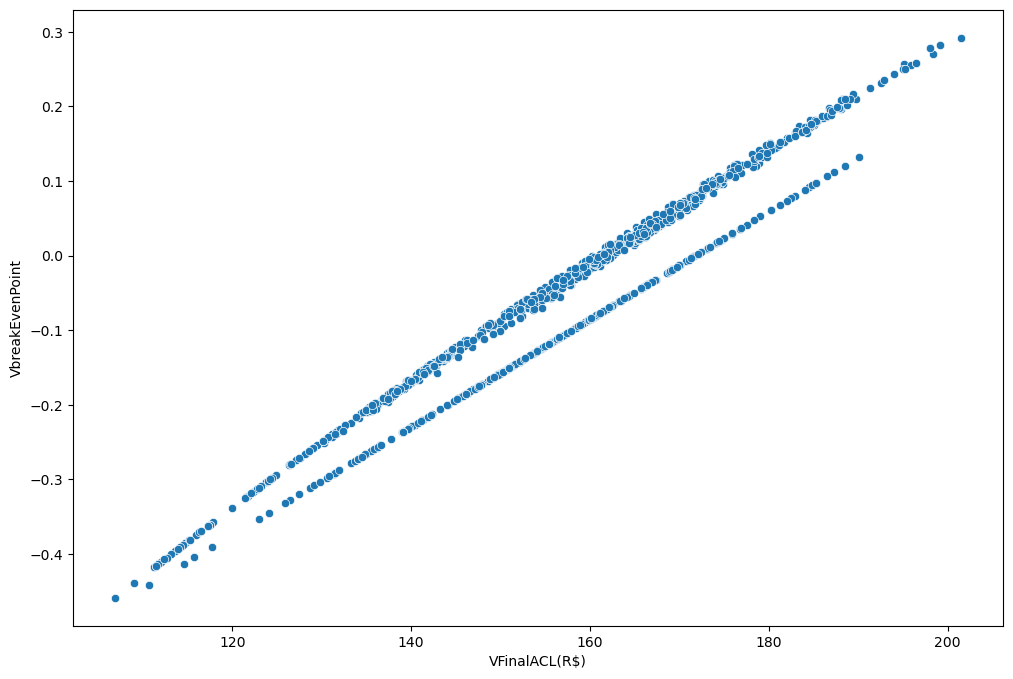

In [73]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['VFinalACL(R$)'], y=y_train)
plt.show()


--- Avaliação no Conjunto de TREINO ---
MAE (Mean Absolute Error): 0.00
R-squared (R2): 1.00

--- Avaliação no Conjunto de TESTE ---
MAE (Mean Absolute Error): 0.00
R-squared (R2): 1.00

--- Plotagem das Previsões ---


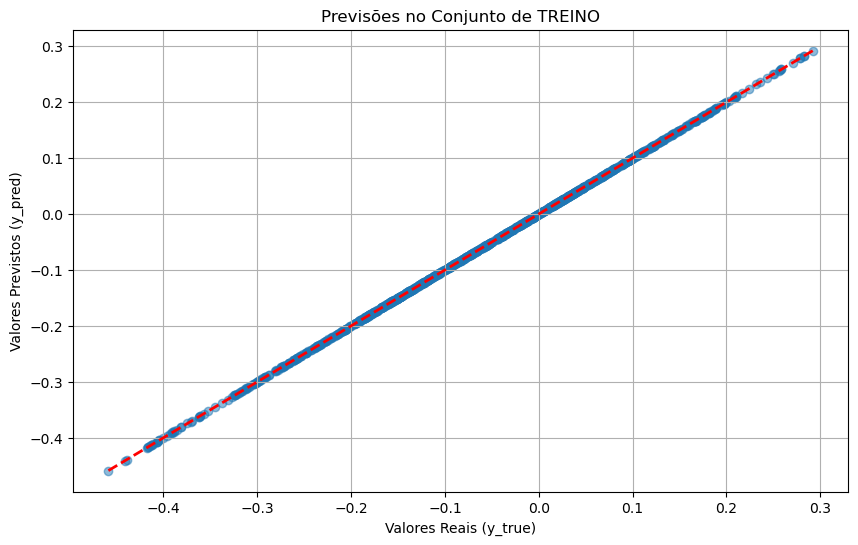

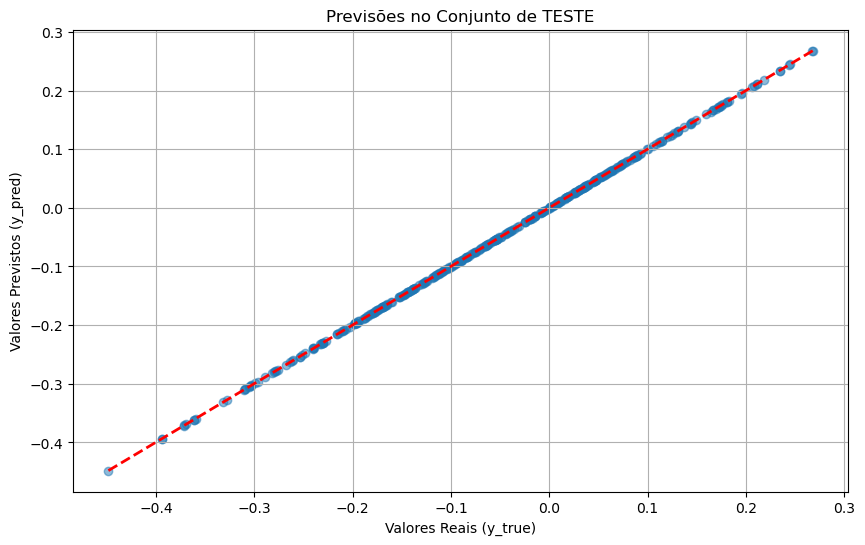

In [74]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# --- 1. Definindo Features (X) e Target (y) ---

# Variável Target (aque que deve ser prevista)
y = AneelVerdeTE['VbreakEvenPoint']

# As features (as colunas usadas para prever o VbreakEvenPoint)

features_para_X = [
    'TUSD_ACR_Verde',
    'TE-ACR',
    'V-ICMS',
    'V-PIS/COFINS',
    'V-finalACRVerde',
    'TUSD_ACL_Verde',
    'V-ICMS_ACL',
    'V-PisCofins_ACL',
    'VFinalACL(R$)',
    'Ponta', 
    'Fora Ponta',  
]

X = AneelVerdeTE[features_para_X]

# --- 2. Dividindo os dados em conjuntos de Treino e Teste ---
# Aqui, X_train terá as features para treino, y_train o target para treino
# X_test terá as features para teste, y_test o target para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# --- 3. Treinando o Modelo de Regressão Linear ---
lm = LinearRegression()

# O modelo é treinado com MÚLTIPLAS FEATURES (X_train) para prever um TARGET (y_train)
lm.fit(X_train, y_train)

# --- 4. Fazendo Previsões ---
# Previsões no conjunto de TREINO (para ver como ele se saiu nos dados que já viu)
y_train_pred = lm.predict(X_train)

# Previsões no conjunto de TESTE (para avaliar a generalização do modelo)
y_test_pred = lm.predict(X_test)

# --- 5. Avaliando o Modelo ---

print("\n--- Avaliação no Conjunto de TREINO ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_train, y_train_pred):.2f}")

print("\n--- Avaliação no Conjunto de TESTE ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_test_pred):.2f}")

# --- 6. Plotando Previsões vs. Valores Reais ---

def plot_predictions(y_true, y_pred, title="Previsões vs. Valores Reais"):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2) # Linha ideal (y_true == y_pred)
    plt.xlabel("Valores Reais (y_true)")
    plt.ylabel("Valores Previstos (y_pred)")
    plt.title(title)
    plt.grid(True)
    plt.show()

print("\n--- Plotagem das Previsões ---")
plot_predictions(y_train, y_train_pred, "Previsões no Conjunto de TREINO")
plot_predictions(y_test, y_test_pred, "Previsões no Conjunto de TESTE")

#### Overfitting, ou o modelo aprendeu a equacao para chegar ao VbreakEvenPoint e está calculando os resultados? 
##### Mais provável Overfitting


In [75]:
# Fazer o o mesmo para Aneel Azul
AneelAzulTE.describe()

,Ponta,Fora Ponta,TUSD_ACR_Azul,TE-ACR,V-ICMS,V-PIS/COFINS,V-finalACRAzul,TUSD_ACL_Azul,V-ICMS_ACL,V-PisCofins_ACL,VFinalACL(R$),VbreakEvenPoint
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,0.289119,0.199165,72.517472,92.993500,36.331677,15.309765,196.676387,59.853753,21.352599,9.914874,181.750439,0.072597
std,0.105752,0.061620,23.989847,29.571218,11.733235,4.944255,64.625937,18.924281,4.154111,1.928921,25.007313,0.194520
min,0.027700,0.016180,6.530162,8.074323,3.205863,1.350915,17.617101,5.160182,9.346694,4.340047,109.476135,-0.446785
25%,0.207165,0.156875,55.560501,71.934917,28.089131,11.836448,150.938447,46.467520,18.414158,8.550437,164.061328,-0.067524
50%,0.290620,0.207325,72.810858,95.536769,37.056319,15.615121,197.847065,61.455995,21.704311,10.078188,183.867707,0.074099
75%,0.365670,0.241817,89.378771,113.294852,44.502688,18.752938,241.978981,72.905911,24.217707,11.245259,198.998091,0.209263
max,0.560800,0.348210,132.453871,167.194742,65.776525,27.717497,358.401764,107.286361,31.764635,14.749603,244.429812,0.564381


### Criando um modelo pra a modalidade Azul 

Shape de X_train: (1120, 11)
Shape de X_test: (374, 11)
Shape de y_train: (1120,)
Shape de y_test: (374,)

--- Avaliação no Conjunto de TREINO ---
MAE (Mean Absolute Error): 0.00
R-squared (R2): 1.00

--- Avaliação no Conjunto de TESTE ---
MAE (Mean Absolute Error): 0.00
R-squared (R2): 1.00

--- Plotagem das Previsões ---


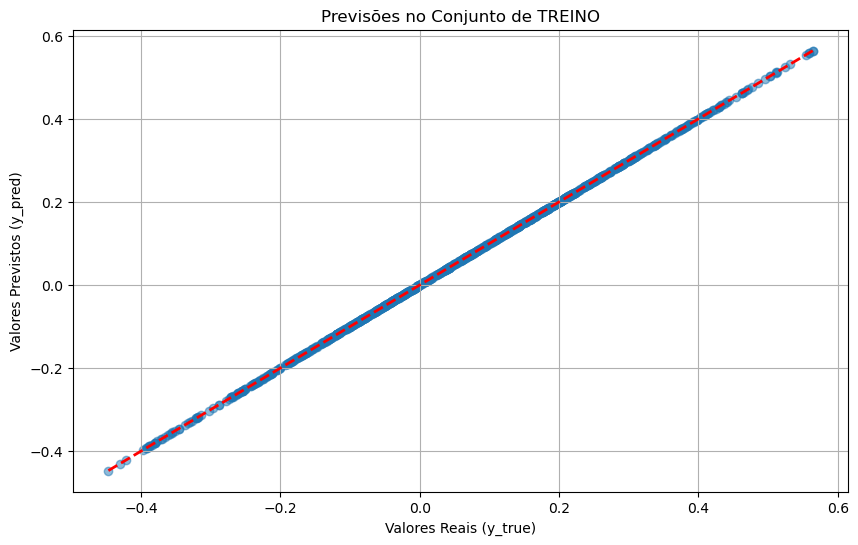

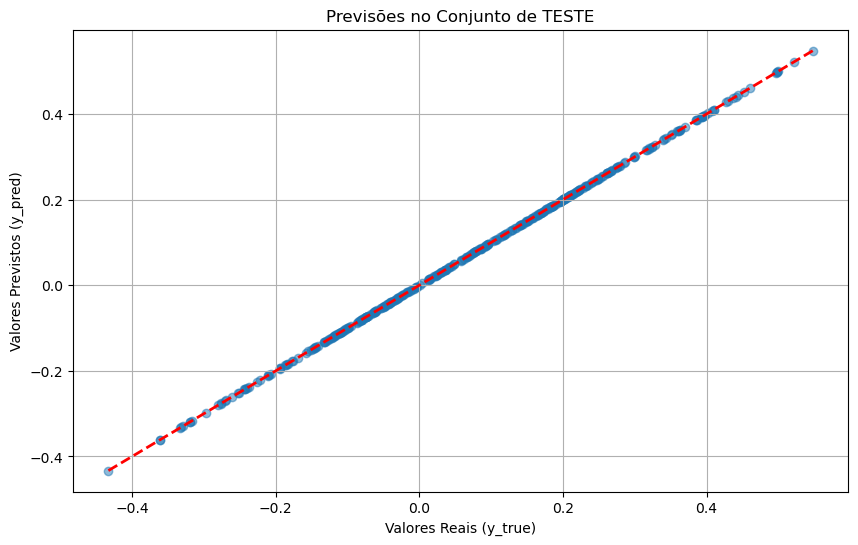

In [76]:
# --- 1. Definindo Features (X) e Target (y) ---

# Variável Target (aque que deve ser prevista)
y = AneelAzulTE['VbreakEvenPoint']

# As features (as colunas usadas para prever o VbreakEvenPoint)

features_para_X = [
    'TUSD_ACR_Azul',
    'TE-ACR',
    'V-ICMS',
    'V-PIS/COFINS',
    'V-finalACRAzul',
    'TUSD_ACL_Azul',
    'V-ICMS_ACL',
    'V-PisCofins_ACL',
    'VFinalACL(R$)',
    'Ponta', 
    'Fora Ponta'
   ]

X = AneelAzulTE[features_para_X]

# --- 2. Dividir os dados em conjuntos de Treino e Teste ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

# --- 3. Treinando o Modelo de Regressão Linear ---
lm = LinearRegression()

# O modelo é treinado com MÚLTIPLAS FEATURES (X_train) para prever um TARGET (y_train)
lm.fit(X_train, y_train)

# --- 4. Fazendo Previsões ---
# Previsões no conjunto de TREINO (para ver como ele se saiu nos dados que já viu)
y_train_pred = lm.predict(X_train)

# Previsões no conjunto de TESTE (para avaliar a generalização do modelo)
y_test_pred = lm.predict(X_test)

# --- 5. Avaliando o Modelo ---

print("\n--- Avaliação no Conjunto de TREINO ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_train, y_train_pred):.2f}")

print("\n--- Avaliação no Conjunto de TESTE ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_test_pred):.2f}")

# --- 6. Plotando Previsões vs. Valores Reais ---

def plot_predictions(y_true, y_pred, title="Previsões vs. Valores Reais"):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2) # Linha ideal (y_true == y_pred)
    plt.xlabel("Valores Reais (y_true)")
    plt.ylabel("Valores Previstos (y_pred)")
    plt.title(title)
    plt.grid(True)
    plt.show()

print("\n--- Plotagem das Previsões ---")
plot_predictions(y_train, y_train_pred, "Previsões no Conjunto de TREINO")
plot_predictions(y_test, y_test_pred, "Previsões no Conjunto de TESTE")

### Os dados são muitos complexos e não oferecem bons resultados com modelos mais simples. 
### A solução foi utilizar <span style="color:red">modelos de Deep Learning</span>

# Deep Learning

In [77]:
# pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [78]:
# Configuraçoes e Carregamento dos Dados
import pandas as pd
import warnings
# Suprimir o UserWarning específico do openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

# Carregendo os dados limpos salvos anteriormente

AneelAzulTE = pd.read_csv("./dataset/AneelAzulTECorrigido.csv")
AneelVerdeTE = pd.read_csv("./dataset/AneelVerdeTECorrigido.csv")

In [79]:
print("O numero de linhas do Dataframe Aneel Azul", AneelAzulTE.shape[0], "e o do Aneel Azul", AneelAzulTE.shape[0])

O numero de linhas do Dataframe Aneel Azul 1494 e o do Aneel Azul 1494


In [80]:
print("\nInformações do DataFrame (tipos de dados e valores nulos):\n")
print(AneelVerdeTE.info())
print(AneelAzulTE.info())

print("\nEstatísticas descritivas:\n")
print(AneelVerdeTE.describe().round(3))
print(AneelAzulTE.describe().round(3))


Informações do DataFrame (tipos de dados e valores nulos):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sigla                 1494 non-null   object 
 1   Resolução ANEEL       1494 non-null   object 
 2   Início Vigência       1494 non-null   object 
 3   Fim Vigência          1494 non-null   object 
 4   Base Tarifária        1494 non-null   object 
 5   Subgrupo              1494 non-null   object 
 6   Modalidade            1494 non-null   object 
 7   Unidade               1494 non-null   object 
 8   Ponta                 1494 non-null   float64
 9   Fora Ponta            1494 non-null   float64
 10  Consumo_medio_mensal  1494 non-null   float64
 11  TUSD_ACR_Verde        1494 non-null   float64
 12  TE-ACR                1494 non-null   float64
 13  V-ICMS                1494 non-null   float64
 14  V-PIS/COFIN

### Teste de normalidade dos dados

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

### Análise para o DataFrame <span style="color:green">AneelVerdeTE</span>


--- Análise para AneelVerdeTE ---
Teste de Shapiro-Wilk para 'VbreakEvenPoint':
Estatística: 0.9925, P-valor: 0.0000
Os dados da coluna 'VbreakEvenPoint' não parecem seguir uma distribuição normal (rejeita H0).


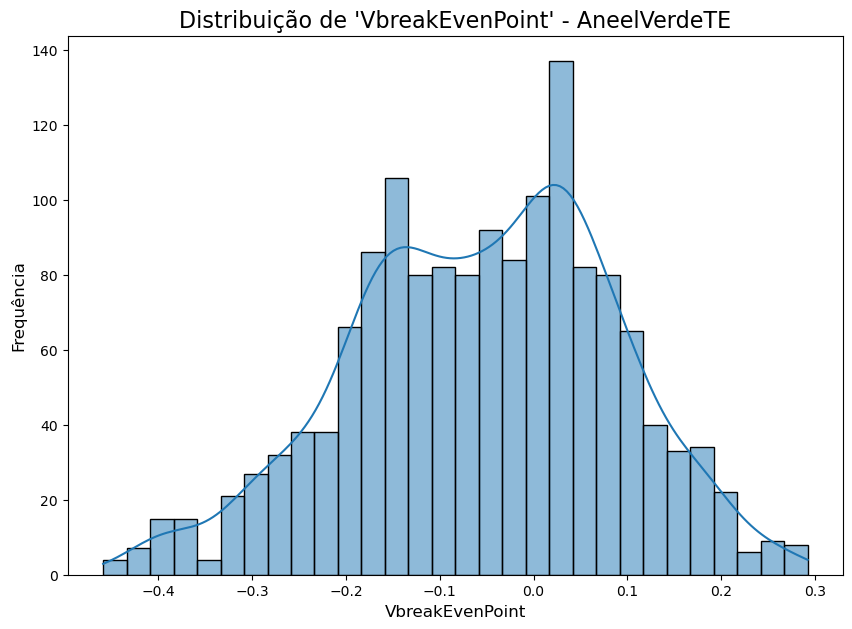

In [82]:
# Análise e Plotagem para o DataFrame 'AneelVerdeTE'
# --- Verificação da Normalidade para AneelVerdeTE ---

# Assumindo que AneelVerdeTE já existe e tem a coluna 'VbreakEvenPoint'.
if 'VbreakEvenPoint' in AneelVerdeTE.columns:
    dados_verde = AneelVerdeTE['VbreakEvenPoint']

    # Teste de Shapiro-Wilk para verificar a normalidade
    statistic_verde, p_value_verde = stats.shapiro(dados_verde)
    
    print("\n--- Análise para AneelVerdeTE ---")
    print(f"Teste de Shapiro-Wilk para 'VbreakEvenPoint':")
    print(f"Estatística: {statistic_verde:.4f}, P-valor: {p_value_verde:.4f}")
    
    if p_value_verde > 0.05:
        print("Os dados da coluna 'VbreakEvenPoint' parecem seguir uma distribuição normal (não rejeita H0).")
    else:
        print("Os dados da coluna 'VbreakEvenPoint' não parecem seguir uma distribuição normal (rejeita H0).")

    # Gerar o gráfico de distribuição
    plt.figure(figsize=(10, 7))
    sns.histplot(data=dados_verde, kde=True, bins=30, edgecolor='black')
    plt.title("Distribuição de 'VbreakEvenPoint' - AneelVerdeTE", fontsize=16)
    plt.xlabel('VbreakEvenPoint', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'AneelVerdeTE' não possui a coluna 'VbreakEvenPoint'. Verifique o nome da coluna.")

### Análise para o DataFrame <span style="color:blue">AneelAzulTE</span>

--- Análise para AneelAzulTE ---
Teste de Shapiro-Wilk para 'VbreakEvenPoint':
Estatística: 0.9940, P-valor: 0.0000
Os dados da coluna 'VbreakEvenPoint' não parecem seguir uma distribuição normal (rejeita H0).


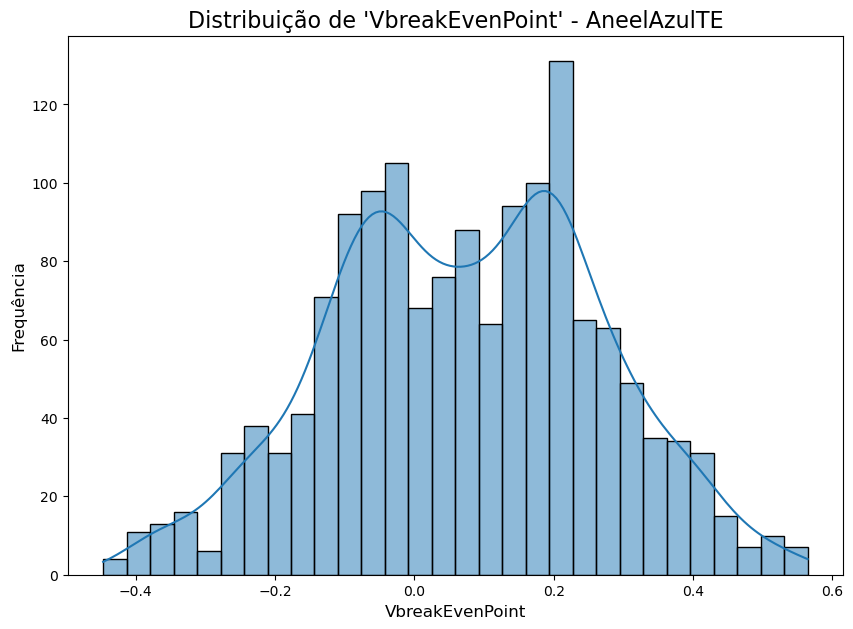

In [83]:
# Análise e Plotagem para o DataFrame 'AneelAzulTE'
# --- Verificando a Normalidade para AneelAzulTE ---

if 'VbreakEvenPoint' in AneelAzulTE.columns:
    dados_azul = AneelAzulTE['VbreakEvenPoint']

    # Teste de Shapiro-Wilk para verificar a normalidade
    statistic_azul, p_value_azul = stats.shapiro(dados_azul)
    
    print("--- Análise para AneelAzulTE ---")
    print(f"Teste de Shapiro-Wilk para 'VbreakEvenPoint':")
    print(f"Estatística: {statistic_azul:.4f}, P-valor: {p_value_azul:.4f}")
    
    if p_value_azul > 0.05:
        print("Os dados da coluna 'VbreakEvenPoint' parecem seguir uma distribuição normal (não rejeita H0).")
    else:
        print("Os dados da coluna 'VbreakEvenPoint' não parecem seguir uma distribuição normal (rejeita H0).")

    # Gerando o gráfico de distribuição
    plt.figure(figsize=(10, 7))
    sns.histplot(data=dados_azul, kde=True, bins=30, edgecolor='black')
    plt.title("Distribuição de 'VbreakEvenPoint' - AneelAzulTE", fontsize=16)
    plt.xlabel('VbreakEvenPoint', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'AneelAzulTE' não possui a coluna 'VbreakEvenPoint'. Verifique o nome da coluna.")


# Correlacao Linear

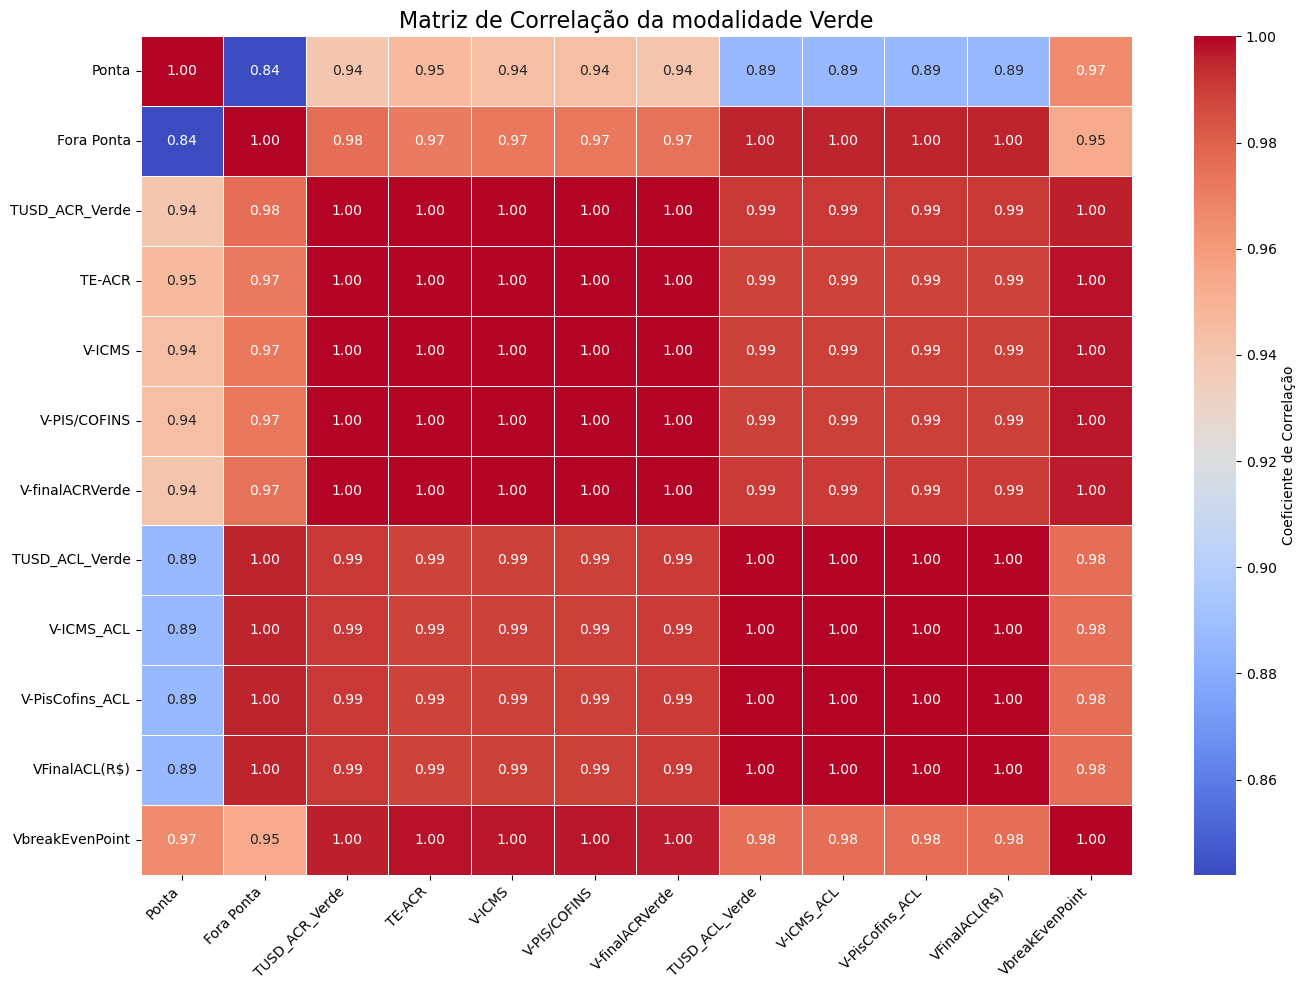

In [84]:
# Matriz de correlação

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Selecionando apenas as colunas numéricas ---
numeric_cols = AneelVerdeTE.select_dtypes(include=np.number).columns.tolist()

# --- Removendo colunas com valores constantes da lista de colunas numéricas ---
columns_to_exclude = ['Consumo_medio_mensal', 'VMedEner_ACL','V-CCEE'] # colunas constantes 
filtered_numeric_cols = [col for col in numeric_cols if col not in columns_to_exclude]

df_numeric_filtered = AneelVerdeTE[filtered_numeric_cols]

# --- Calculando a matriz de correlação ---
correlation_matrix = df_numeric_filtered.corr()

# --- Plotando a matriz de correlação como um heatmap(mapa de calor) ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Matriz de Correlação da modalidade Verde', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

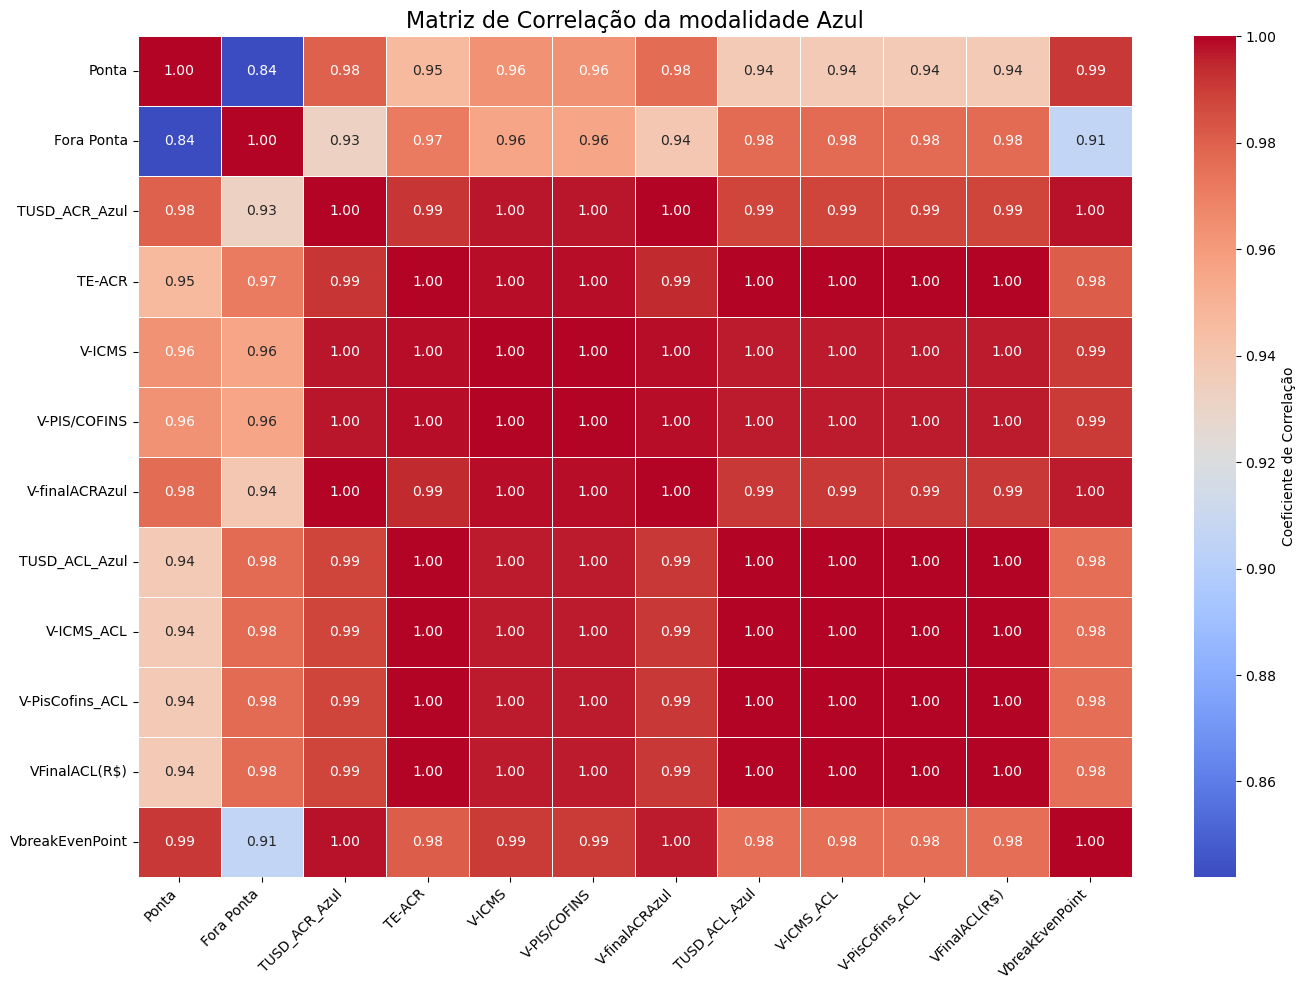

In [85]:
# Matriz de correlação

# --- Selecionando apenas as colunas numéricas ---
numeric_cols = AneelAzulTE.select_dtypes(include=np.number).columns.tolist()

# ---  Removendo colunas com valores constantes da lista de colunas numéricas ---
columns_to_exclude = ['Consumo_medio_mensal', 'VMedEner_ACL','V-CCEE'] # colunas constantes 
filtered_numeric_cols = [col for col in numeric_cols if col not in columns_to_exclude]

df_numeric_filtered = AneelAzulTE[filtered_numeric_cols]

# --- Calculando a matriz de correlação ---
correlation_matrix = df_numeric_filtered.corr()

# --- Plotando a matriz de correlação como um heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Matriz de Correlação da modalidade Azul', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Esta matriz de correlação revela um cenário de multicolinearidade extrema. Quase todas as variáveis apresentam correlações acima de 0.95, com muitas chegando a 1.00 (correlação perfeita).

Para um modelo de Deep Learning com ativação ReLU, esse conjunto de dados apresenta desafios específicos e alguns riscos estruturais:

Enfrenta redundância extrema de dados: O modelo processa múltiplas variáveis que entregam a mesma informação, o que eleva o custo computacional e favorece o overfitting, sem agregar ganho real de inteligência à rede.

Apresenta instabilidade no ajuste de pesos: A alta correlação dificulta a convergência do otimizador, fazendo com que o sistema distribua a importância entre as entradas de forma imprevisível e torne o aprendizado pouco reproduzível.

Arrisca a inatividade de neurônios (Dying ReLU): A dependência de variáveis quase idênticas pode levar a pesos excessivamente negativos durante o treino, resultando em neurônios que param de responder e "morrem" devido à natureza da função de ativação ReLU.

# Recomendações Técnicas
Para melhorar o desempenho desse modelo de Deep Learning, considere os seguintes passos antes do treinamento:

Redução de Dimensionalidade (PCA): Como os dados são altamente lineares, um PCA (Análise de Componentes Principais) poderia provavelmente reduzir essas 12 variáveis para apenas 2 ou 3 componentes, retendo 99% da variância.

Eliminação de Variáveis: Remova manualmente as colunas que possuem correlação de 1.00 entre si. Mantenha apenas uma representante de cada "grupo" altamente correlacionado.

Regularização: Utilize L2 Regularization (Weight Decay). Isso ajudará a distribuir os pesos de forma mais uniforme entre as variáveis correlacionadas, evitando que o modelo dependa excessivamente de uma única entrada redundante.

Troca de Ativação: Se notar que muitos neurônios estão ficando inativos (saída zero), tente usar Leaky ReLU ou ELU para manter o gradiente fluindo mesmo para valores negativos.

# Recomendações Técnicas
Para melhorar o desempenho desse modelo de Deep Learning, considere os seguintes passos antes do treinamento:

Redução de Dimensionalidade (PCA): Como os dados são altamente lineares, um PCA (Análise de Componentes Principais) poderia provavelmente reduzir essas 12 variáveis para apenas 2 ou 3 componentes, retendo 99% da variância.

Regularização: Utilize L2 Regularization (Weight Decay). Isso ajudará a distribuir os pesos de forma mais uniforme entre as variáveis correlacionadas, evitando que o modelo dependa excessivamente de uma única entrada redundante.

Troca de Ativação: Se notar que muitos neurônios estão ficando inativos (saída zero), tente usar Leaky ReLU ou ELU para manter o gradiente fluindo mesmo para valores negativos.

# Correlacao

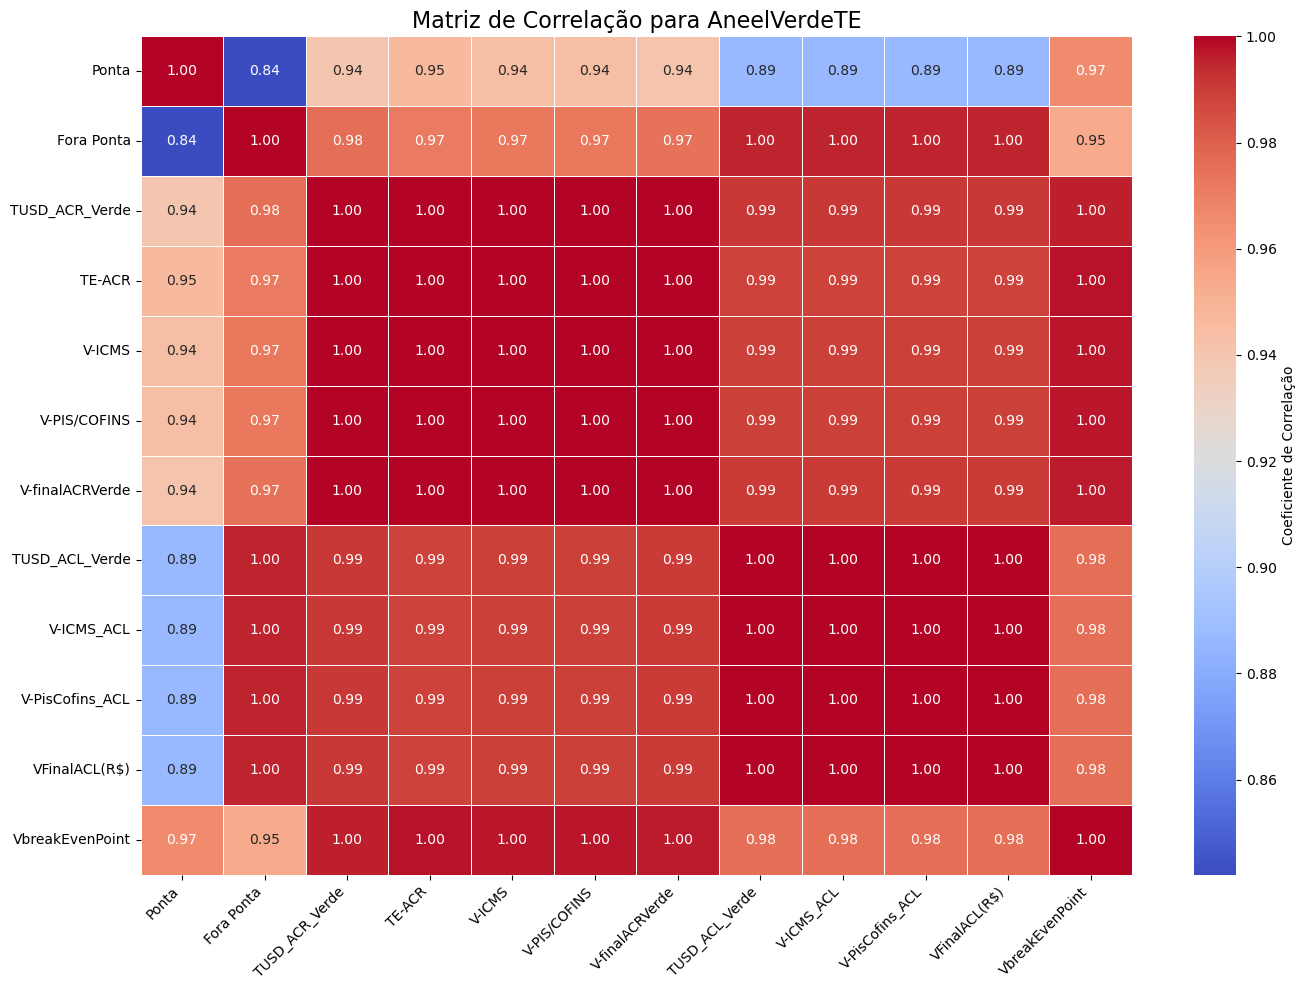

In [86]:
# Matriz de correlação

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Selecionando apenas as colunas numéricas ---
numeric_cols = AneelVerdeTE.select_dtypes(include=np.number).columns.tolist()

# --- Removendo colunas com valores constantes ---
columns_to_exclude = ['Consumo_medio_mensal', 'VMedEner_ACL','V-CCEE'] 
filtered_numeric_cols = [col for col in numeric_cols if col not in columns_to_exclude]

df_numeric_filtered = AneelVerdeTE[filtered_numeric_cols]

# --- Calculando a matriz de correlação ---
correlation_matrix = df_numeric_filtered.corr()

# --- Plotando a matriz de correlação como um mapa de calor ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Matriz de Correlação para AneelVerdeTE', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

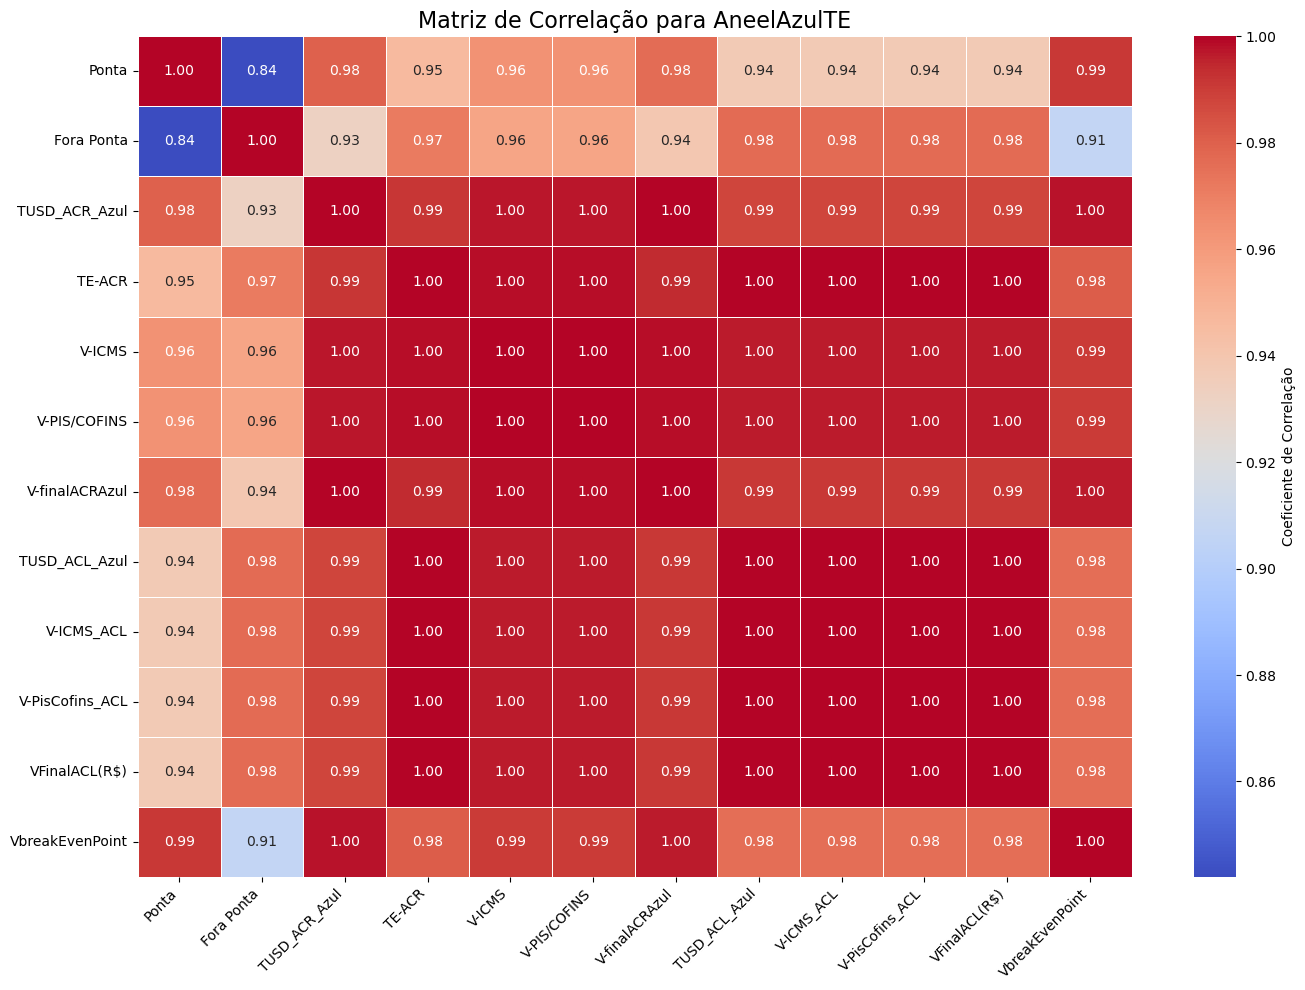

In [87]:
# Matriz de correlação

# --- Selecionando apenas as colunas numéricas ---
numeric_cols = AneelAzulTE.select_dtypes(include=np.number).columns.tolist()

# --- Removendo colunas com valores constantes ---
columns_to_exclude = ['Consumo_medio_mensal', 'VMedEner_ACL','V-CCEE'] # colunas constantes 
filtered_numeric_cols = [col for col in numeric_cols if col not in columns_to_exclude]

df_numeric_filtered = AneelAzulTE[filtered_numeric_cols]

# --- Calculando a matriz de correlação ---
correlation_matrix = df_numeric_filtered.corr()

# --- Plotando a matriz de correlação como um mapa de calor ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Matriz de Correlação para AneelAzulTE', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Testando a normalidade dos resíduos

### Análise para o DataFrame <span style="color:blue">AneelAzulTE</span>

In [88]:
# Usando a coluna de resíduos para o teste. 
residuosAzul = AneelAzulTE['VbreakEvenPoint']

# Realizando o Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(residuosAzul)

print(f"Estatística do teste de Shapiro-Wilk: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Os dados parecem seguir uma distribuição normal (não rejeita H0).")
else:
    print("Os dados não parecem seguir uma distribuição normal (rejeita H0).")

Estatística do teste de Shapiro-Wilk: 0.9940
P-valor: 0.0000
Os dados não parecem seguir uma distribuição normal (rejeita H0).


### Análise para o DataFrame <span style="color:green">AneelVerdeTE</span>

In [89]:
# Usando a coluna de resíduos para o teste. 
residuosVerde = AneelVerdeTE['VbreakEvenPoint']

# Realizando o Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(residuosVerde)

print(f"Estatística do teste de Shapiro-Wilk: {statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Os dados parecem seguir uma distribuição normal (não rejeita H0).")
else:
    print("Os dados não parecem seguir uma distribuição normal (rejeita H0).")

Estatística do teste de Shapiro-Wilk: 0.9925
P-valor: 0.0000
Os dados não parecem seguir uma distribuição normal (rejeita H0).


# Análise para o DataFrame <span style="color:blue">AneelAzulTE</span>

In [90]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas Keras/TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Importando KerasRegressor e Scikit-learn
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA # <--- NOVO

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

# --- Carregando o DataFrame ---
AneelAzulTE = pd.read_csv("./dataset/AneelAzulTECorrigido.csv")

# --- Pré-processamento ---
target_variable = 'VbreakEvenPoint'
columns_to_drop = [target_variable]
for col in ['Sigla', 'Unidade']:
    if col in AneelAzulTE.columns:
        columns_to_drop.append(col)

X = AneelAzulTE.drop(columns=columns_to_drop, errors='ignore')
y = AneelAzulTE[target_variable]

# Tratamento de nulos
for col in X.select_dtypes(include=np.number).columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

# One-Hot Encoding
categorical_features = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


## Utilizando Redução de Dimensionalidade (PCA) no dataframe

Como os dados são altamente lineares, como visto na análise de correlação linear, um PCA pode reduzir essas 12 variáveis para apenas 2 ou 3 componentes, retendo 99% da variância.

In [91]:
# Escalonamento (Obrigatório antes do PCA)
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

# Aplicação do PCA (Redução de Colinearidade)
# Mantendo 95% da variância explicada
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_data)

# Criando o DataFrame final que será usado no modelo
X_final = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print(f"\n--- PCA Aplicado ---")
print(f"Features originais: {X.shape[1]} -> Componentes após PCA: {X_final.shape[1]}")

# 3. Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)



--- PCA Aplicado ---
Features originais: 2291 -> Componentes após PCA: 1272


##### Encontrando o melhor modelo

In [94]:
# --- Modelo e Treinamento ---

from tensorflow.keras.layers import Input # <--- Adicionado para resolver o Warning

# --- Função do Modelo Atualizada (Sem Warning) ---
def create_keras_model(n_neurons_1=32, n_neurons_2=16, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)), # <--- Nova forma correta de definir a entrada
        Dense(n_neurons_1, activation='relu'),
        Dense(n_neurons_2, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# --- Configuração do Grid Search ---
keras_model = KerasRegressor(model=create_keras_model, verbose=0)

param_grid = {
    'model__n_neurons_1': [8, 16, 32],
    'model__n_neurons_2': [4, 8, 14],
    'model__learning_rate': [0.01, 0.001],
    'batch_size': [8, 16],
    'epochs': [50, 100],
}

# ... (rodar o grid_search.fit como você já fez) ...

# --- Treinamento Final (Correção do KeyError) ---
bp = grid_search.best_params_ # bp agora contém chaves como 'model__n_neurons_1'

final_best_model = create_keras_model(
    n_neurons_1=bp['model__n_neurons_1'],     # <--- Adicionado prefixo 'model__'
    n_neurons_2=bp['model__n_neurons_2'],     # <--- Adicionado prefixo 'model__'
    learning_rate=bp['model__learning_rate']  # <--- Adicionado prefixo 'model__'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_final = final_best_model.fit(
    X_train, y_train,
    epochs=bp['epochs'] * 2, # 'epochs' não tem prefixo, então continua igual
    batch_size=bp['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2038 - mae: 0.2873 - val_loss: 0.0642 - val_mae: 0.1873
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0892 - mae: 0.1945 - val_loss: 0.0388 - val_mae: 0.1605
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0816 - mae: 0.1816 - val_loss: 0.0352 - val_mae: 0.1521
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0457 - mae: 0.1642 - val_loss: 0.0340 - val_mae: 0.1518
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - mae: 0.1567 - val_loss: 0.0343 - val_mae: 0.1530
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0341 - mae: 0.1481 - val_loss: 0.0342 - val_mae: 0.1522
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 - mae: 0.1422 - val_loss: 0.0337 - val_mae: 0.1509
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0313 - mae: 0.1365 - val_loss: 0.0337 - val_mae: 0.1481
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Avaliação Final do Modelo (Pós-PCA) ---
Mean Squared Error (MSE): 0.0084
Mean Absolute Error (MAE): 0.0715
R-squared (R2): 0.7575


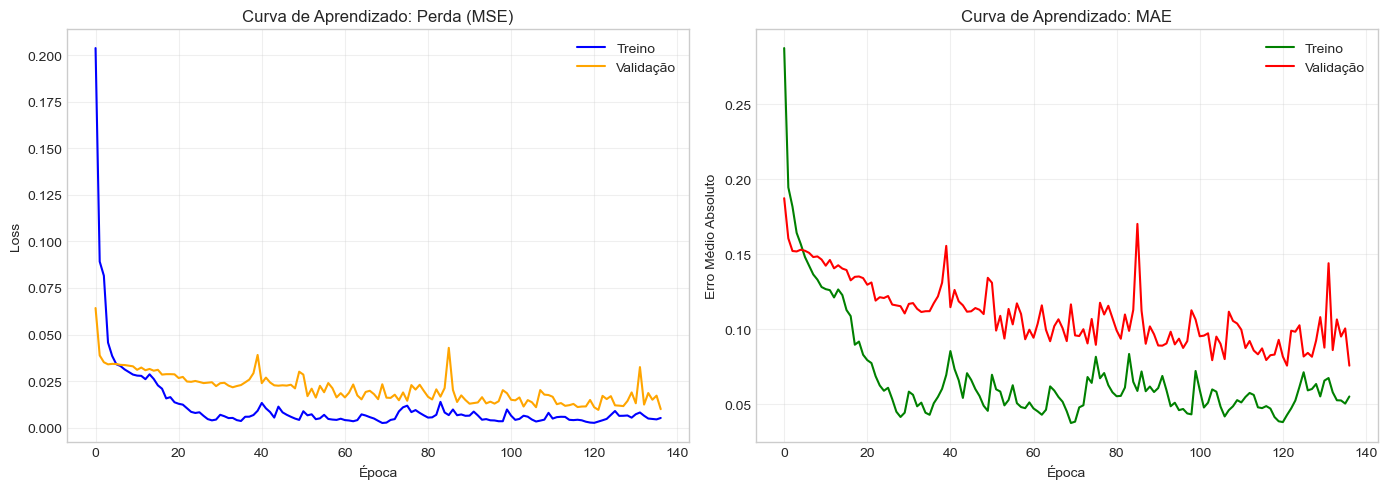

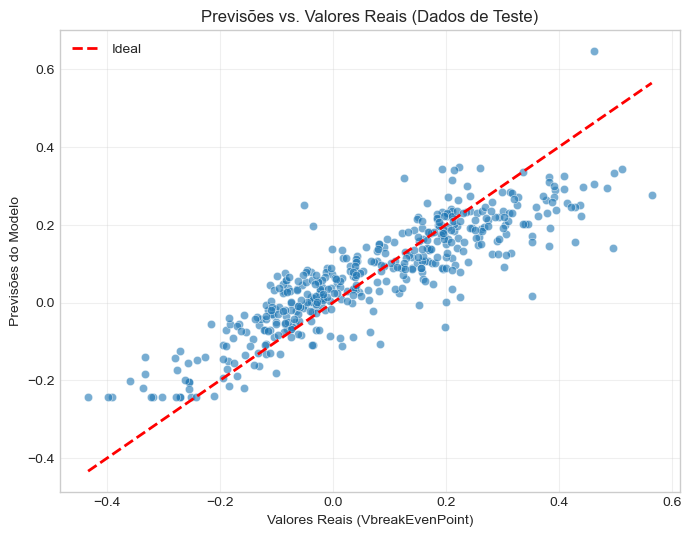

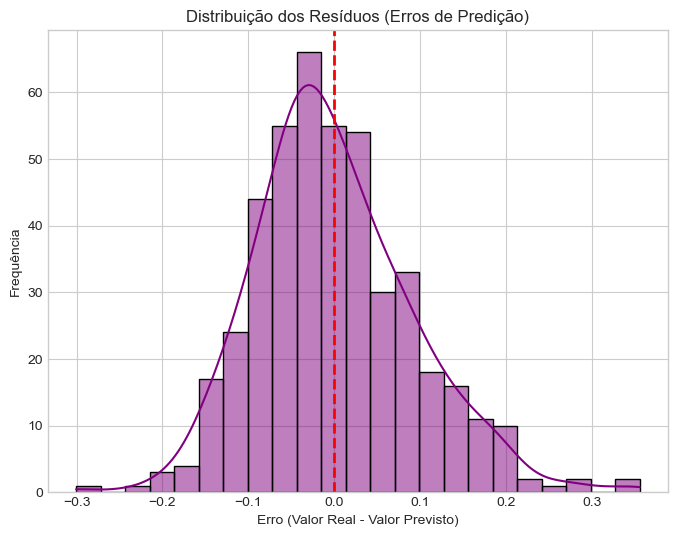

In [96]:
# --- 5. Avaliação do Modelo (Versão Final com PCA) ---

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo previsões no conjunto de teste (X_test já está em formato PCA)
y_pred = final_best_model.predict(X_test).flatten() 

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Avaliação Final do Modelo (Pós-PCA) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 1. Visualizando o Histórico de Treinamento
# Usamos 'history_final' que foi o objeto gerado no seu fit final
plt.figure(figsize=(14, 5))

# Plotando perda (MSE)
plt.subplot(1, 2, 1)
plt.plot(history_final.history['loss'], label='Treino', color='blue')
plt.plot(history_final.history['val_loss'], label='Validação', color='orange')
plt.title('Curva de Aprendizado: Perda (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plotando MAE
plt.subplot(1, 2, 2)
plt.plot(history_final.history['mae'], label='Treino', color='green')
plt.plot(history_final.history['val_mae'], label='Validação', color='red')
plt.title('Curva de Aprendizado: MAE')
plt.xlabel('Época')
plt.ylabel('Erro Médio Absoluto')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Visualizando Previsões vs. Valores Reais
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Linha de identidade (onde a previsão é perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal') 
plt.xlabel('Valores Reais (VbreakEvenPoint)')
plt.ylabel('Previsões do Modelo')
plt.title('Previsões vs. Valores Reais (Dados de Teste)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Análise de Resíduos (Fundamental para validar o PCA)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', lw=2) # Linha do erro zero
plt.title('Distribuição dos Resíduos (Erros de Predição)')
plt.xlabel('Erro (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.show()

# Análise para o DataFrame <span style="color:green">AneelVerdeTE</span>

In [97]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA # <--- Importação do PCA

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

# --- Carregando o DataFrame ---
AneelVerdeTE = pd.read_csv("./dataset/AneelVerdeTECorrigido.csv")

# --- Pré-processamento ---
target_variable = 'VbreakEvenPoint'
columns_to_drop = [target_variable]
for col in ['Sigla', 'Unidade']:
    if col in AneelVerdeTE.columns:
        columns_to_drop.append(col)

X = AneelVerdeTE.drop(columns=columns_to_drop, errors='ignore')
y = AneelVerdeTE[target_variable]

# Tratamento de valores ausentes
for col in X.select_dtypes(include=np.number).columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

# One-Hot Encoding
categorical_features = X.select_dtypes(include='object').columns
if not categorical_features.empty:
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


## Utilizando PCA 

In [98]:
# 1. Escalonamento 
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

# 2. Aplicação do PCA para reduzir a alta colinearidade
# Mantendo 95% da variância explicada
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_data)

# Transformando em DataFrame para manter o fluxo do código
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print(f"\n--- Redução de Dimensionalidade (PCA) ---")
print(f"Número original de features: {X.shape[1]}")
print(f"Número de componentes principais (95% variância): {X_pca_df.shape[1]}")

# 3. Divisão dos dados em treino e teste (70/30) usando os componentes do PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.3, random_state=42)



--- Redução de Dimensionalidade (PCA) ---
Número original de features: 2291
Número de componentes principais (95% variância): 1272


#### Encontrando o melhor modelo

In [99]:
from tensorflow.keras.layers import Input

# --- Modelo Keras Atualizado ---
def create_keras_model(n_neurons_1=32, n_neurons_2=16, learning_rate=0.001):
    model = Sequential([
        # Define a entrada explicitamente para evitar Warnings
        Input(shape=(X_train.shape[1],)), 
        Dense(n_neurons_1, activation='relu'),
        Dense(n_neurons_2, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

keras_model = KerasRegressor(model=create_keras_model, verbose=0)

# Espaço de busca com os prefixos necessários para o SciKeras
param_grid = {
    'model__n_neurons_1': [8, 16, 32],
    'model__n_neurons_2': [4, 8, 14],
    'model__learning_rate': [0.01, 0.001], 
    'batch_size': [8, 16],                 
    'epochs': [50, 100],                   
}

print("\n--- Iniciando GridSearchCV (AneelVerdeTE + PCA) ---")
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# --- Treinamento Final ---
# Obtemos o dicionário de melhores parâmetros
bp = grid_search.best_params_

# Criamos o modelo final acessando as chaves COM o prefixo 'model__'
final_best_model = create_keras_model(
    n_neurons_1=bp['model__n_neurons_1'],
    n_neurons_2=bp['model__n_neurons_2'],
    learning_rate=bp['model__learning_rate']
)

early_stopping_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Treinamento do modelo final
# Nota: 'epochs' e 'batch_size' não levam o prefixo 'model__' por padrão no best_params
history_final = final_best_model.fit(
    X_train, y_train,
    epochs=bp['epochs'] * 2, 
    batch_size=bp['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping_final],
    verbose=1
)



--- Iniciando GridSearchCV (AneelVerdeTE + PCA) ---
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1029 - mae: 0.2187 - val_loss: 0.0299 - val_mae: 0.1372
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0389 - mae: 0.1424 - val_loss: 0.0190 - val_mae: 0.1105
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 - mae: 0.1139 - val_loss: 0.0190 - val_mae: 0.1128
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 - mae: 0.1077 - val_loss: 0.0183 - val_mae: 0.1120
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 - mae: 0.0950 - val_loss: 0.0183 - val_mae: 0.1118
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - mae: 0.0880 - val_loss: 0.0185 - val_mae: 0.1120
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - mae: 0.0887 - val_loss: 0.0175 - val_mae: 0.1088
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Avaliação Final do Modelo (Pós-PCA) ---
Mean Squared Error (MSE): 0.0051
Mean Absolute Error (MAE): 0.0547
R-squared (R2): 0.7179


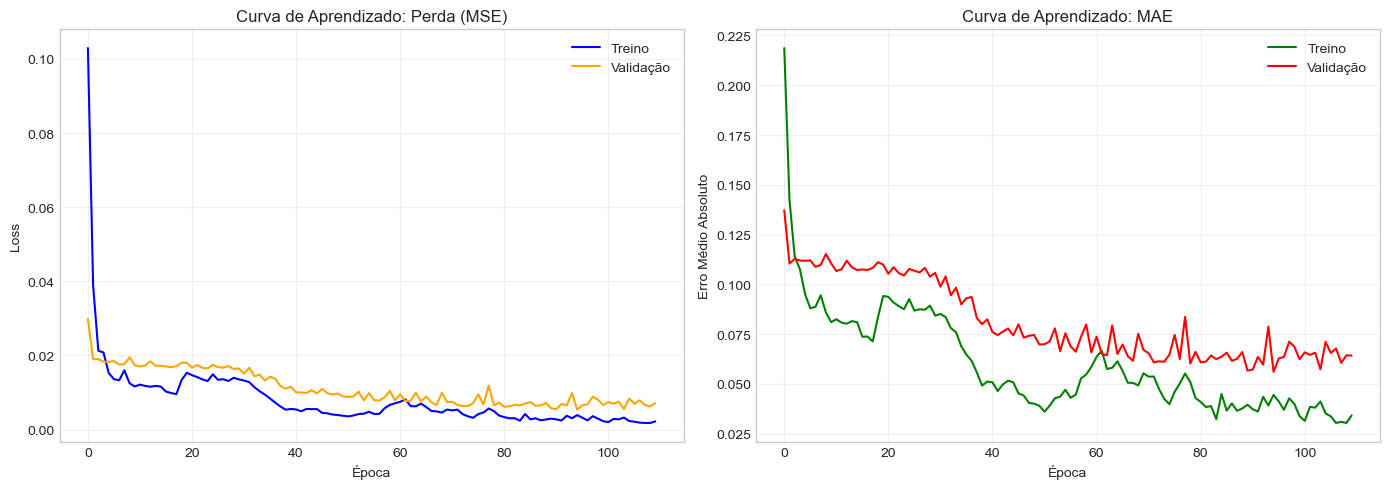

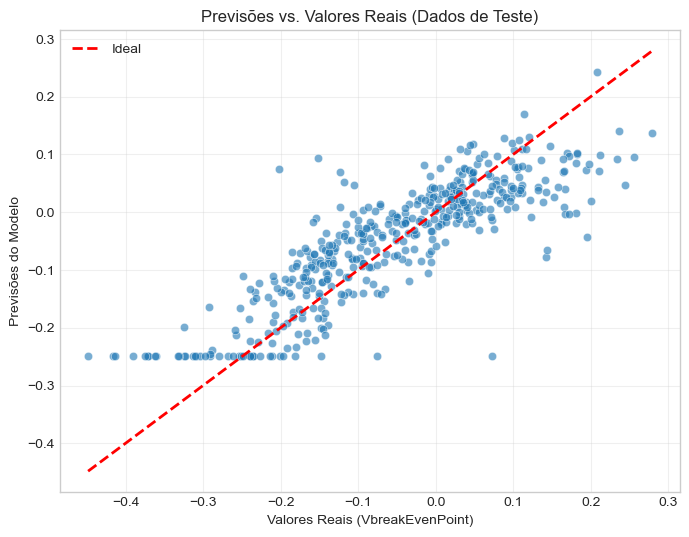

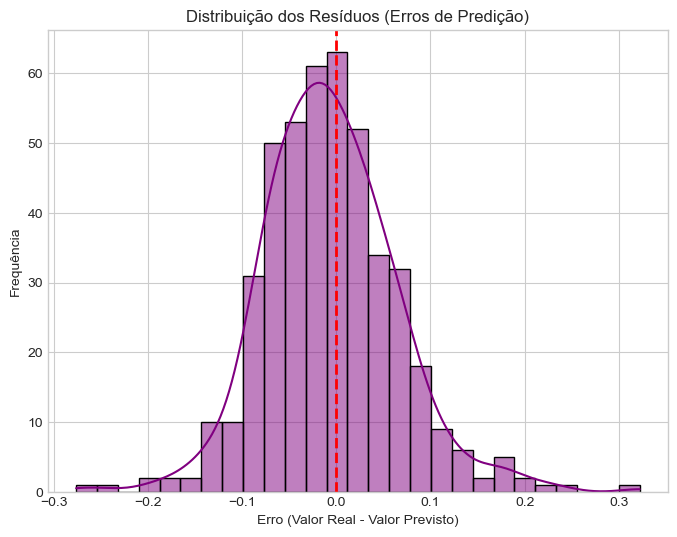

In [100]:
# --- 5. Avaliação do Modelo (Versão Final com PCA) ---

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo previsões no conjunto de teste (X_test já está em formato PCA)
y_pred = final_best_model.predict(X_test).flatten() 

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Avaliação Final do Modelo (Pós-PCA) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 1. Visualizando o Histórico de Treinamento
# Usamos 'history_final' que foi o objeto gerado no seu fit final
plt.figure(figsize=(14, 5))

# Plotando perda (MSE)
plt.subplot(1, 2, 1)
plt.plot(history_final.history['loss'], label='Treino', color='blue')
plt.plot(history_final.history['val_loss'], label='Validação', color='orange')
plt.title('Curva de Aprendizado: Perda (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plotando MAE
plt.subplot(1, 2, 2)
plt.plot(history_final.history['mae'], label='Treino', color='green')
plt.plot(history_final.history['val_mae'], label='Validação', color='red')
plt.title('Curva de Aprendizado: MAE')
plt.xlabel('Época')
plt.ylabel('Erro Médio Absoluto')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Visualizando Previsões vs. Valores Reais
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Linha de identidade (onde a previsão é perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal') 
plt.xlabel('Valores Reais (VbreakEvenPoint)')
plt.ylabel('Previsões do Modelo')
plt.title('Previsões vs. Valores Reais (Dados de Teste)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Análise de Resíduos (Fundamental para validar o PCA)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', lw=2) # Linha do erro zero
plt.title('Distribuição dos Resíduos (Erros de Predição)')
plt.xlabel('Erro (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.show()